# Proyek Analisis Data: Air Quality
- Nama: Taufik Abdullah
- Email: taufikabdullah700@gmail.com
- Id Dicoding: https://www.dicoding.com/users/taufik_abdullah_22

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara sepanjang tahun? Apakah ada pola musiman?
- Bagaimana hubungan antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan kualitas udara?
- Stasiun mana yang memiliki kualitas udara terburuk dan terbaik?
- Bagaimana jumlah kategori indeks kualitas udara (AQI) untuk berbagai stasiun?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

## Data Wrangling

### Gathering Data

Pada proyek analisis data kali ini saya memilih **Air Quality Dataset** yang terdiri dari 12 file stasiun pengukuran kualitas udara yaitu Autizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shuyi, Tiantan, Wanliu serta Wanshouxigong . Oleh karena itu, pada tahap ini saya akan memuat (load) kedua belas file tersebut.



Sebelumnya Saya telah membuat folder `data` yang berisi 12 file stasiun pengukuran kualitas udara yang telah saya unggah pada google collab. Disini saya memuat kedua belas file yang berformat `csv` menggunakan library `pandas` berupa `read_csv`untuk membaca file CSV dan mengonversinya menjadi DataFrame dengan koma sebagai pemisah antar kolomnya.

In [ ]:
directory = "/content/data"

data = {}

for file in os.listdir(directory):
    dataframe = os.path.splitext(file)[0].split("_")[2]
    data[dataframe] = pd.read_csv(os.path.join(directory, file),delimiter=",")

In [ ]:
data['Aotizhongxin'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4096,4097,2013,8,18,16,10.0,10.0,7.0,16.0,400.0,136.0,34.8,1001.10,14.1,0.0,WSW,1.4,Aotizhongxin
14916,14917,2014,11,12,12,3.0,39.0,5.0,7.0,300.0,64.0,6.3,1021.00,-18.5,0.0,N,3.1,Aotizhongxin
24814,24815,2015,12,29,22,527.0,590.0,35.0,159.0,8000.0,11.0,-3.0,1024.10,-4.7,0.0,E,0.7,Aotizhongxin
34326,34327,2017,1,29,6,9.0,63.0,3.0,5.0,200.0,81.0,0.3,1021.75,-20.4,0.0,NE,7.2,Aotizhongxin
32578,32579,2016,11,17,10,67.0,67.0,16.0,59.0,1600.0,5.0,6.7,1021.50,-1.7,0.0,SSE,0.5,Aotizhongxin


In [ ]:
data['Changping'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
13216,13217,2014,9,2,16,7.0,7.0,2.0,15.0,500.0,75.0000,21.6,1002.3,15.4,0.0,NE,3.0,Changping
5777,5778,2013,10,27,17,219.0,237.0,61.0,122.0,1900.0,36.6282,12.6,1007.7,4.3,0.0,ENE,0.6,Changping
16992,16993,2015,2,7,0,15.0,24.0,9.0,27.0,500.0,58.0000,5.0,1017.0,-13.4,0.0,NW,3.8,Changping
22746,22747,2015,10,4,18,NaN,NaN,10.0,96.0,1300.0,72.0000,20.3,1011.6,13.0,0.0,NNW,1.5,Changping
14797,14798,2014,11,7,13,35.0,67.0,33.0,34.0,1600.0,30.0000,7.3,1015.0,-8.3,0.0,E,1.6,Changping


In [ ]:
data['Dingling'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
11304,11305,2014,6,15,0,32.0,38.0,2.0,11.0,300.0,138.0,24.7,996.9,17.7,0.0,N,0.8,Dingling
2575,2576,2013,6,16,7,122.0,129.0,8.0,24.0,1000.0,81.0,23.3,995.8,16.8,0.0,SSE,0.4,Dingling
11004,11005,2014,6,2,12,14.0,21.0,3.0,4.0,300.0,141.0,23.4,1003.4,11.4,0.0,ESE,1.4,Dingling
26567,26568,2016,3,11,23,64.0,95.0,9.0,33.0,800.0,38.0,0.1,1011.3,-14.7,0.0,E,0.6,Dingling
330,331,2013,3,14,18,142.0,140.0,66.0,83.0,1200.0,72.0,7.3,1015.0,-3.9,0.0,ESE,1.6,Dingling


In [ ]:
data['Dongsi'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
8459,8460,2014,2,16,11,268.0,194.0,78.0,NaN,2600.0,43.0,5.1,1026.3,-9.5,0.0,SE,0.7,Dongsi
32431,32432,2016,11,11,7,136.0,159.0,8.0,75.0,3000.0,2.0,2.8,1010.5,0.7,0.0,E,1.0,Dongsi
10078,10079,2014,4,24,22,122.0,147.0,20.0,54.0,1200.0,116.0,18.7,1012.0,11.0,0.0,SSE,1.4,Dongsi
189,190,2013,3,8,21,57.0,80.0,30.0,85.0,1300.0,99.0,6.0,1002.0,-4.5,0.0,ESE,1.9,Dongsi
14901,14902,2014,11,11,21,3.0,73.0,2.0,23.0,600.0,43.0,10.0,1017.0,-11.4,0.0,NW,6.0,Dongsi


In [ ]:
data['Guanyuan'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7637,7638,2014,1,13,5,77.0,95.0,87.0,82.0,2000.0,1.0,-10.0,1026.8,-14.8,0.0,SSW,0.5,Guanyuan
13945,13946,2014,10,3,1,102.0,102.0,3.0,79.0,1500.0,3.0,11.8,1010.9,11.8,0.0,ENE,1.3,Guanyuan
30395,30396,2016,8,18,11,63.0,63.0,2.0,58.0,2000.0,2.0,23.2,997.1,22.5,4.7,ENE,1.4,Guanyuan
25929,25930,2016,2,14,9,11.0,11.0,5.0,20.0,300.0,49.0,-5.5,1029.5,-22.0,0.0,NW,4.7,Guanyuan
33516,33517,2016,12,26,12,16.0,16.0,10.0,28.0,600.0,46.0,3.5,1028.3,-15.7,0.0,ENE,3.9,Guanyuan


In [ ]:
data['Gucheng'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3265,3266,2013,7,15,1,54.0,54.0,3.0,20.0,600.0,68.0,22.6,996.5,21.9,3.3,NE,0.4,Gucheng
7215,7216,2013,12,26,15,9.0,18.0,5.0,13.0,400.0,72.0,1.7,1025.3,-18.9,0.0,W,2.0,Gucheng
11767,11768,2014,7,4,7,94.0,94.0,2.0,30.0,900.0,54.0,27.0,997.3,24.6,0.0,N,1.0,Gucheng
688,689,2013,3,29,16,90.0,140.0,32.0,71.0,1399.0,75.0,9.8,1011.5,-7.0,0.0,W,1.1,Gucheng
12988,12989,2014,8,24,4,21.0,21.0,2.0,22.0,400.0,64.0,22.2,999.5,19.4,0.6,NNW,0.8,Gucheng


In [ ]:
data['Huairou'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9720,9721,2014,4,10,0,73.0,332.0,13.000,27.0000,600.0,105.00,15.9,1011.6,-0.4,0.0,WNW,1.4,Huairou
27574,27575,2016,4,22,22,16.0,28.0,2.000,13.0000,200.0,67.00,18.8,1002.7,-19.6,0.0,N,3.2,Huairou
18901,18902,2015,4,27,13,NaN,NaN,24.000,22.0000,1500.0,175.00,25.1,995.7,13.9,0.0,SW,2.2,Huairou
1884,1885,2013,5,18,12,212.0,236.0,51.408,73.0868,NaN,64.26,21.9,997.3,15.0,0.0,WSW,1.5,Huairou
31940,31941,2016,10,21,20,33.0,33.0,2.000,NaN,600.0,27.00,10.2,1009.2,9.9,0.9,NNW,1.1,Huairou


In [ ]:
data['Nongzhanguan'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26364,26365,2016,3,3,12,322.0,322.0,79.0,126.0,4100.0,30.0,10.6,1008.1,0.6,0.0,ENE,1.5,Nongzhanguan
9986,9987,2014,4,21,2,75.0,92.0,8.0,119.0,1100.0,2.0,9.1,1012.3,4.7,0.0,SW,0.6,Nongzhanguan
2999,3000,2013,7,3,23,45.0,105.0,9.0,116.0,1500.0,4.0,26.0,991.0,21.9,0.0,WSW,0.0,Nongzhanguan
3910,3911,2013,8,10,22,101.0,119.0,11.0,37.0,1200.0,130.0,30.0,1002.5,25.3,0.0,SSW,1.7,Nongzhanguan
32743,32744,2016,11,24,7,10.0,37.0,7.0,67.0,800.0,2.0,-5.6,1027.5,-12.6,0.0,ESE,1.1,Nongzhanguan


In [ ]:
data['Shunyi'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6753,6754,2013,12,7,9,69.0,63.0,33.0,52.0,2300.0,3.0,1.3,1018.4,-6.1,0.0,NE,1.0,Shunyi
15363,15364,2014,12,1,3,11.0,127.0,2.0,2.0,200.0,51.0,-4.4,1018.0,-25.2,0.0,NW,6.0,Shunyi
33698,33699,2017,1,3,2,264.0,264.0,18.0,134.0,5100.0,4.0,-4.5,1020.4,-7.6,0.0,NaN,0.0,Shunyi
34822,34823,2017,2,18,22,118.0,172.0,46.0,110.0,1000.0,8.0,4.8,1012.4,-9.4,0.0,SSE,2.2,Shunyi
9558,9559,2014,4,3,6,3.0,5.0,2.0,10.0,100.0,74.0,10.0,1022.3,-9.7,0.0,SW,1.1,Shunyi


In [ ]:
data['Tiantan'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
15486,15487,2014,12,6,6,26.0,26.0,17.0,65.0,1100.0,6.0,-5.0,1023.0,-18.8,0.0,NE,1.5,Tiantan
8799,8800,2014,3,2,15,153.0,155.0,91.0,80.0,2700.0,61.0,10.1,1015.6,-7.2,0.0,SE,2.6,Tiantan
25890,25891,2016,2,12,18,167.0,167.0,6.0,92.0,2600.0,2.0,6.8,1011.3,4.1,0.3,NE,0.9,Tiantan
17079,17080,2015,2,10,15,105.0,105.0,48.0,78.0,1400.0,80.0,11.0,1008.0,-17.4,0.0,SSW,1.6,Tiantan
6722,6723,2013,12,6,2,121.0,118.0,60.0,66.0,2100.0,2.0,2.6,1017.0,-9.0,0.0,SW,1.5,Tiantan


In [ ]:
data['Wanliu'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
10818,10819,2014,5,25,18,3.0,62.0,6.0,16.0,200.0,90.0,24.7,998.7,6.4,0.0,NE,0.6,Wanliu
27919,27920,2016,5,7,7,10.0,80.0,2.0,69.0,400.0,6.0,13.2,1013.8,1.8,0.0,SSE,0.8,Wanliu
29111,29112,2016,6,25,23,31.0,89.0,2.0,84.0,600.0,36.0,24.7,1000.5,12.9,0.0,ENE,0.4,Wanliu
24980,24981,2016,1,5,20,89.0,118.0,31.0,75.0,2000.0,2.0,-4.5,1023.7,-15.2,0.0,SW,0.9,Wanliu
33681,33682,2017,1,2,9,28.0,28.0,19.0,82.0,1600.0,11.0,0.6,1021.5,-11.5,0.0,NE,1.8,Wanliu


In [ ]:
data['Wanshouxigong'].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
22258,22259,2015,9,14,10,87.0,155.0,10.0,94.0,1400.0,17.0,21.8,1015.7,14.9,0.0,NNE,1.2,Wanshouxigong
16430,16431,2015,1,14,14,245.0,255.0,70.0,123.0,3000.0,7.0,0.0,1025.0,-6.6,0.0,ESE,0.9,Wanshouxigong
23302,23303,2015,10,27,22,48.0,56.0,2.0,59.0,1300.0,2.0,7.2,1015.0,-0.8,0.0,ESE,1.5,Wanshouxigong
3579,3580,2013,7,28,3,135.0,72.0,7.0,84.0,2500.0,3.0,22.6,993.4,22.6,0.0,S,0.5,Wanshouxigong
12612,12613,2014,8,8,12,68.0,70.0,9.0,45.0,1100.0,165.0,31.4,1001.9,16.9,0.0,SSW,2.9,Wanshouxigong


### Assessing Data

**Menilai Setiap Data pada dataset Air Quality**

Berikut ini merupakan pengertian dari setiap kolom dataset Air quality yang saya pahami:
- **No**: Nomor urut data
- **year**: Tahun pengambilan data
- **month**: Bulan pengambilan data
- **day**: Hari pengambilan data
- **hour**: Jam pengambilan data
- **PM2.5**: Particulate Matter 2.5, konsentrasi partikel udara berukuran 2.5 mikrometer atau lebih kecil
- **PM10**: Particulate Matter 10, konsentrasi partikel udara berukuran 10 mikrometer atau lebih kecil
- **SO2**: Sulfur Dioxide, konsentrasi gas sulfur dioksida (SO2) dalam udara
- **NO2**: Nitrogen Dioxide, konsentrasi gas nitrogen dioksida (NO2) dalam udara
- **CO**: Carbon Monoxide, konsentrasi gas karbon monoksida (CO) dalam udara
- **O3**: Ozone, konsentrasi gas ozon (O3) dalam udara
- **TEMP**: Temperature, suhu udara (dalam derajat Celsius)
- **PRES**: Pressure, tekanan atmosfer (dalam hPa)
- **DEWP**: Dew Point, titik embun, suhu di mana uap air dalam udara mulai mengembun (dalam derajat Celsius)
- **RAIN**: Rainfall, jumlah curah hujan (dalam mm)
- **wd**: Wind Direction, arah angin
- **WSPM**: Wind Speed per Meter, kecepatan angin (dalam m/s)
- **station**: Station Name, nama stasiun pengukuran kualitas udara

Sebagai awal, langkah pertama yang saya ambil adalah memeriksa tipe data dari setiap kolom yang terdapat dalam dua belas dataset menggunakan metode ```info()```. Hasilnya menunjukkan bahwa tidak ada masalah dengan tipe data dari seluruh kolom dataframe tersebut serta mengurutkannya berdasarkan ```station_names```.



In [ ]:
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

In [ ]:
data_types = {}

for station in station_names:
    if station in data:
        data_types[station] = data[station].drop(['station'], axis=1).dtypes

pd.DataFrame(data_types).T

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Aotizhongxin,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Changping,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Dingling,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Dongsi,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Guanyuan,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Gucheng,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Huairou,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Nongzhanguan,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Shunyi,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
Tiantan,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64


Kemudian saya menggabungkan informasi tanggal dan waktu yang terpisah dalam beberapa kolom, yaitu `year`, `month`, `day`, dan `hour`, menjadi satu kolom bertipe datetime yang disebut `datetime` untuk menciptakan representasi waktu yang konsisten dan mudah diakses.

In [ ]:
def merge_datetime(dataframe):
    columns = ['year', 'month', 'day', 'hour']
    dataframe['datetime'] = pd.to_datetime(dataframe[columns])
    dataframe.drop(columns=columns, inplace=True)
    return dataframe

for df_name, dataframe in data.items():
    data[df_name] = merge_datetime(dataframe)

**Mengecek Jumlah Missing Value pada Dataframe**

Untuk memastikan adanya missing value pada dataframe, disini saya menggunakan `isnull().sum()`untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom dataframe.

In [ ]:
missing_value = {}

for station in station_names:
    if station in data:
        missing_value[station] = data[station].isnull().sum()

pd.DataFrame(missing_value).T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Changping,0,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,0,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Dongsi,0,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Guanyuan,0,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Gucheng,0,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Huairou,0,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Nongzhanguan,0,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Shunyi,0,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Tiantan,0,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0


Terlihat bahwa Semua kolom kecuali `No`, `station`, dan `datetime` memiliki missing data dengan jumlah data yang hilang bervariasi dari belasan hingga ribuan.

**Mengecek Jumlah Duplicated pada Dataframe**

Untuk melihat apakah ada duplikasi pada dataframe, disini saya menggunakan `duplicated().sum()`untuk menampilkan informasi terkait jumlah duplikasi data yang terdapat dalam setiap kolom dataframe.

In [ ]:
data_counts = {}

for station in station_names:
    if station in data:
        dataframe = data[station]
        data_counts[station] = {
            'Duplicate': dataframe.duplicated().sum(),
            'Total Data': len(dataframe)
        }

pd.DataFrame(data_counts).T

,Duplicate,Total Data
Aotizhongxin,0,35064
Changping,0,35064
Dingling,0,35064
Dongsi,0,35064
Guanyuan,0,35064
Gucheng,0,35064
Huairou,0,35064
Nongzhanguan,0,35064
Shunyi,0,35064
Tiantan,0,35064


Terlihat bahwa tidak ada duplikasi data disemua dataframe

**Melihat Parameter Statistik dari DataFrame**

Untuk melihat parameter statistik dari dataframe, disini saya menggunakan `describe()` untuk menampilkan informasi terkait sebaran data yaitu `count`, `mean`, `std`, `min`, `25%`,`50%`, `75%`, `max`, yang terdapat dalam setiap kolom dataframe.

In [ ]:
for df_name, dataframe in data.items():
    print(f"Descriptive statistics for DataFrame: {df_name}")
    print(dataframe.describe())
    print("\n")

Descriptive statistics for DataFrame: Guanyuan
                 No         PM2.5          PM10           SO2           NO2  \
count  35064.000000  34448.000000  34635.000000  34590.000000  34405.000000   
mean   17532.500000     82.933372    109.023303     17.590941     57.901643   
std    10122.249256     80.933497     91.573709     23.600367     35.150857   
min        1.000000      2.000000      2.000000      1.000000      2.000000   
25%     8766.750000     23.000000     40.000000      3.000000     31.000000   
50%    17532.500000     59.000000     89.000000      8.000000     51.000000   
75%    26298.250000    115.000000    149.000000     22.000000     78.000000   
max    35064.000000    680.000000    999.000000    293.000000    270.000000   

                 CO            O3          TEMP          PRES          DEWP  \
count  33311.000000  33891.000000  35044.000000  35044.000000  35044.000000   
mean    1271.294377     55.795044     13.584607   1011.846920      3.123062   
std 

### Cleaning Data

Berdasarkan hasil pengecekan data, terdeteksi keberadaan nilai yang hilang (missing value) pada kolom-kolom kritis seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `O3`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM` di dua belas dataframe. Meskipun terdapat nilai yang hilang, baris data tersebut masih menyimpan sejumlah informasi penting yang dapat memberikan kontribusi signifikan pada analisis data. Oleh karena itu, dalam penanganan kasus ini, saya memilih menggunakan metode interpolasi untuk mengatasi nilai yang hilang pada kolom-kolom tersebut.

Karena baris data tersebut memiliki urutan waktu (time series), saya memutuskan untuk menggunakan metode interpolasi dengan parameter `interpolate(method='linear', inplace=True)`. Pendekatan ini memungkinkan saya untuk mempertahankan urutan waktu dan mengisi nilai yang hilang dengan estimasi linear berdasarkan data sekitarnya.

In [ ]:
for df_name, dataframe in data.items():
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.difference(['No'])
    dataframe[numeric_columns] = dataframe[numeric_columns].interpolate(method='linear', axis=0)

Untuk memastikan proses di atas berjalan dengan semestinya, saya menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [ ]:
missing_value = {}

for station in station_names:
    if station in data:
        missing_value[station] = data[station].isnull().sum()

pd.DataFrame(missing_value).T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,140,0,0,0
Dingling,0,0,0,0,2,0,0,0,0,0,0,140,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0
Gucheng,0,0,0,0,20,0,0,0,0,0,0,159,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,302,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,483,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0


Terlihat bahwa kolom NO2 pada dataframe Dingling dan Gucheng masih mengandung nilai yang hilang. Hal ini disebabkan oleh karakteristik interpolasi yang membutuhkan dua nilai yang mengelilingi titik yang tidak diketahui. Sayangnya, beberapa nilai yang hilang berada di awal set data, sehingga tidak ada nilai lain sebelum titik tersebut untuk digunakan dalam proses interpolasi. Sementara itu, perlu diperhatikan bahwa kolom wd memiliki tipe data kategorikal, yang tidak dapat diinterpolasi dengan metode linear.

Kemudian saya memastikan untuk melihat nilai NaNnya tersebut.

In [ ]:
data['Dingling'][data['Dingling']['NO2'].isnull()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00


In [ ]:
data['Gucheng'][data['Gucheng']['NO2'].isnull()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00
5,6,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng,2013-03-01 05:00:00
6,7,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng,2013-03-01 06:00:00
7,8,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng,2013-03-01 07:00:00
8,9,5.0,9.0,5.0,NaN,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng,2013-03-01 08:00:00
9,10,4.0,10.0,6.0,NaN,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng,2013-03-01 09:00:00



Dalam kasus seperti ini, ketika interpolasi tidak dapat diterapkan, saya akan beralih ke metode ekstrapolasi. Untuk mengatasi nilai yang hilang, saya akan menggunakan nilai statistik, yaitu nilai median. Dengan menggunakan nilai median sebagai pengganti, saya dapat mempertahankan integritas data serta menghindari potensi bias yang dapat muncul jika nilai tersebut diisi dengan nilai yang lain.

Selanjutnya, untuk mengatasi kolom `wd` yang memiliki tipe data kategorikal, saya akan menggunakan metode ffill (forward fill). Dengan menggunakan metode ini, saya akan mengisi nilai yang hilang dengan nilai terakhir yang diketahui dalam kolom tersebut. Hal ini sesuai dengan karakteristik data kategorikal, di mana nilai yang berdekatan cenderung memiliki kemiripan atau pola yang relevan.

In [ ]:
for df_name, dataframe in data.items():
    dataframe['NO2'].fillna(data['Gucheng']['NO2'].median(), inplace=True)

In [ ]:
for df_name, dataframe in data.items():
    dataframe['wd'].fillna(method='ffill', inplace=True)

Saya memastikan kembali tidak ada lagi missing valuenya Untuk memastikan tidak ada lagi missing value, seperti berikut.

In [ ]:
missing_value = {}

for station in station_names:
    if station in data:
        missing_value[station] = data[station].isnull().sum()

pd.DataFrame(missing_value).T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

Pada tahap eksplorasi data ini, langkah awal yang saya lakukan dengan memeriksa kolom datetime guna memahami persebaran data dalam rentang tahun.

In [ ]:
data_per_year = {}

for station in station_names:
    if station in data:
        data_per_year[station] = data[station].groupby(data[station]['datetime'].dt.year).size().reset_index(name='count').set_index('datetime')

pd.concat(data_per_year.values(), keys=data_per_year.keys()).unstack(level=0)

count                                                     \
         Aotizhongxin Changping Dingling Dongsi Guanyuan Gucheng Huairou   
datetime                                                                   
2013             7344      7344     7344   7344     7344    7344    7344   
2014             8760      8760     8760   8760     8760    8760    8760   
2015             8760      8760     8760   8760     8760    8760    8760   
2016             8784      8784     8784   8784     8784    8784    8784   
2017             1416      1416     1416   1416     1416    1416    1416   

                                                           
         Nongzhanguan Shunyi Tiantan Wanliu Wanshouxigong  
datetime                                                   
2013             7344   7344    7344   7344          7344  
2014             8760   8760    8760   8760          8760  
2015             8760   8760    8760   8760          8760  
2016             8784   8784    8784   8784          8784  
2017             1416   1416    1416   1416          1416

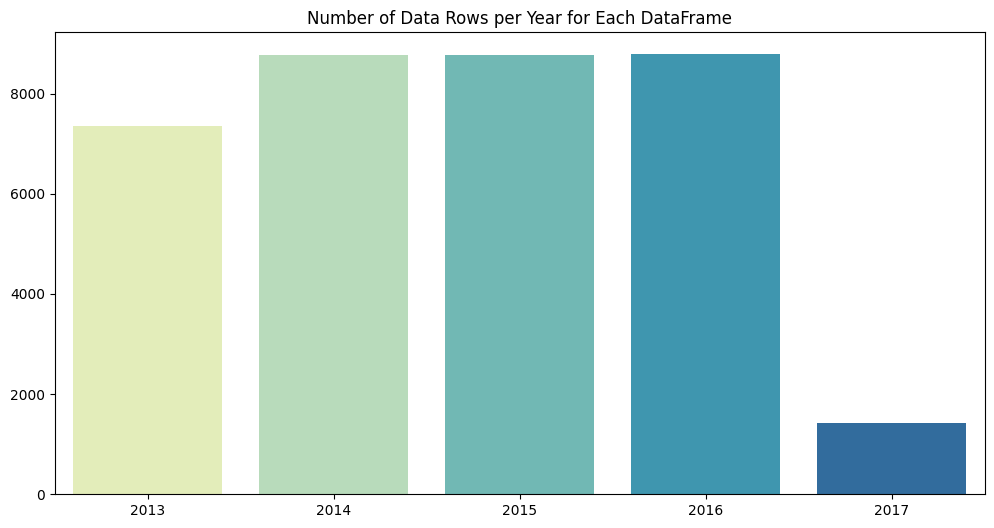

In [ ]:
total_count_per_year = {}
for df_name, dataframe in data_per_year.items():
    total_count_per_year[df_name] = dataframe.groupby('datetime')['count'].median().reset_index(name='count')

colors = sns.color_palette('YlGnBu', 6)
palette = [color_j for color_i in colors for color_j in sns.dark_palette(color_i, 9)[-1:]]

plt.figure(figsize=(12, 6))
for df_name, data_frame in total_count_per_year.items():

    sns.barplot(data=data_frame, x='datetime', y='count', label=df_name, palette=palette)
    sns.dark_palette("#69d", reverse=True, as_cmap=True)

plt.title('Number of Data Rows per Year for Each DataFrame')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Dari diagram batang (barchart) yang telah disajikan, dapat diperhatikan bahwa distribusi data ini dimulai pada tahun 2013, menunjukkan titik awal dari periode yang diamati. Persebaran data tersebut kemudian menunjukkan kestabilan yang merata pada rentang waktu dari tahun 2014 hingga 2016 dan berakhir pada awal tahun 2017.

Kemudian saya menghitung jumlah pengamatan angin (wind observations) berdasarkan arah angin ('wd') untuk setiap stasiun.

In [ ]:
data_counts_wind = {}

for station in station_names:
    if station in data:
        data_counts_wind[station] = data[station].groupby(data[station]['wd']).size()

pd.concat(data_counts_wind.values(), keys=data_counts_wind.keys()).unstack(level=0)

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
wd,,,,,,,,,,,,
E,2611,2433,2433,3567,2611,1613,2182,3567,1163,3567,1265,2810
ENE,3956,1312,1312,3867,3956,1889,2040,3867,1421,3867,3643,3085
ESE,1719,2789,2789,2708,1719,1359,2032,2708,1387,2708,572,1774
N,2069,3793,3793,1868,2069,3957,1376,1868,3916,1868,3223,1179
NE,5161,1737,1737,3560,5161,3131,2281,3560,3437,3560,6740,3588
NNE,2446,1925,1925,1929,2446,2606,1697,1929,4600,1929,3333,1565
NNW,1589,4790,4790,1693,1589,1615,1678,1693,1678,1693,1398,1187
NW,1865,3868,3868,2472,1865,2789,5049,2472,2476,2472,1115,2557
S,1304,1701,1701,1547,1304,2351,1332,1547,2636,1547,968,1506


Kemudian saya ingin melihat pengamatan angin (wind observations) berdasarkan arah angin ('wd') untuk setiap stasiun.

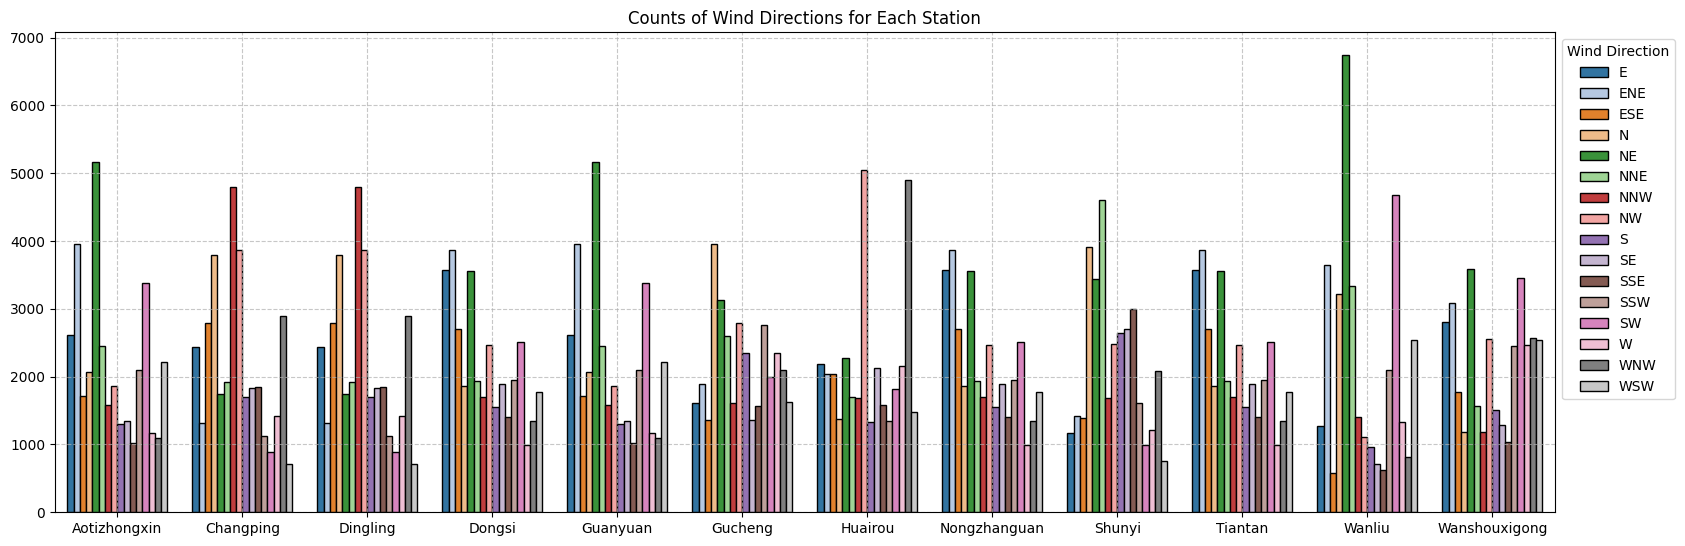

In [ ]:
merge_wind = pd.concat(data_counts_wind.values(), keys=data_counts_wind.keys())
merge_wind = merge_wind.reset_index()

plt.figure(figsize=(25, 6))
sns.barplot(data=merge_wind, x='level_0', y=0, hue='wd', palette='tab20', edgecolor='black')
plt.title('Counts of Wind Directions for Each Station')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)
plt.legend(title='Wind Direction', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari hasil diagram batang yang telah disajikan, terlihat bahwa distribusi arah angin ('wd') di setiap stasiun menunjukkan perbedaan yang signifikan, dan secara umum, arah angin NE (Timur Laut) mendominasi di sebagian besar stasiun. Puncak batang yang lebih tinggi pada arah angin NE mengindikasikan bahwa arah angin tersebut memiliki kontribusi yang lebih besar dibandingkan arah angin lainnya di stasiun-stasiun tersebut.

Selanjutnya, saya membandingkan data antara periode hujan dan tidak hujan pada kolom RAIN untuk setiap stasiun guna mendapatkan wawasan lebih lanjut. Analisis ini memberikan gambaran perbandingan distribusi frekuensi antara kondisi hujan dan tidak hujan, memungkinkan saya untuk menilai potensi pengaruh curah hujan terhadap variabel yang diamati di setiap stasiun.

In [ ]:
data_counts_rain = {}

for station in station_names:
    if station in data:
        # Assuming 'data' is a dictionary with station names as keys and corresponding dataframes as values
        rain_counts = data[station]['RAIN'].apply(lambda x: 'Hujan' if x > 0 else 'Tidak').value_counts()
        data_counts_rain[station] = rain_counts

pd.concat(data_counts_rain.values(), keys=data_counts_rain.keys()).unstack(level=0)

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
Tidak,33684,33712,33712,33693,33684,33716,33571,33693,33752,33693,33628,33703
Hujan,1380,1352,1352,1371,1380,1348,1493,1371,1312,1371,1436,1361


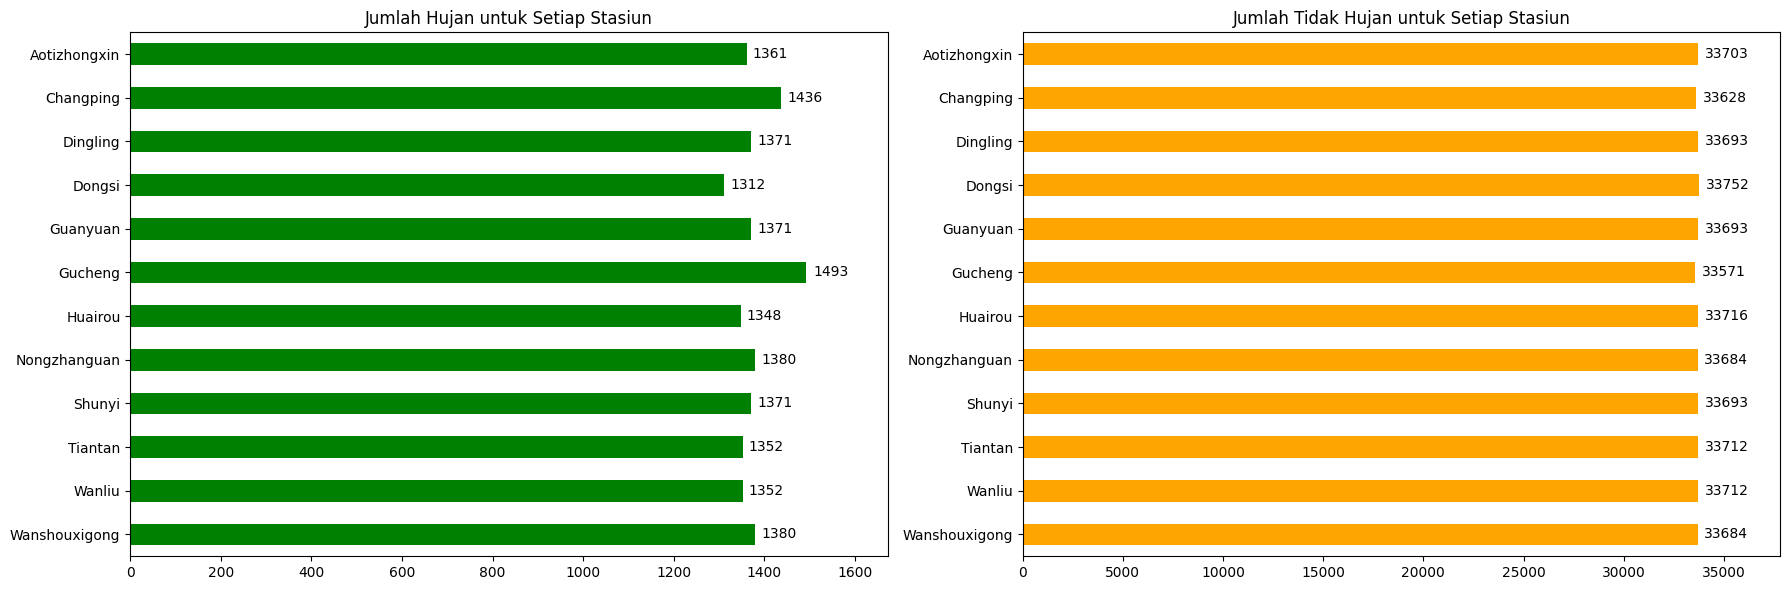

In [ ]:
counts_rain = pd.concat(data_counts_rain.values(), keys=data_counts_rain.keys()).unstack(level=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

rain_plot = counts_rain.loc['Hujan'].plot(kind='barh',  color='green', ax=axes[0])
axes[0].set_title('Jumlah Hujan untuk Setiap Stasiun')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].margins(x=0.12)
axes[0].set_yticklabels(reversed(axes[0].get_yticklabels()))

for i in range(len(counts_rain.loc['Hujan'])):
    axes[0].text(counts_rain.loc['Hujan'][i] / 0.99, i, counts_rain.loc['Hujan'][i], ha='left', va='center')

not_rain_plot = counts_rain.loc['Tidak'].plot(kind='barh', color='orange', ax=axes[1])  # Use log scale for better visibility
axes[1].set_title('Jumlah Tidak Hujan untuk Setiap Stasiun')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].margins(x=0.12)
axes[1].set_yticklabels(reversed(axes[1].get_yticklabels()))

for i in range(len(counts_rain.loc['Tidak'])):
    axes[1].text(counts_rain.loc['Tidak'][i] / 0.99, i, counts_rain.loc['Tidak'][i], ha='left', va='center')

plt.tight_layout()
plt.show()

Dari dua grafik yang disajikan, perbedaan yang signifikan terlihat jelas antara data cuaca hujan dan tidak hujan. Dengan jumlah sekitar 33 ribu data pada kondisi tidak hujan, kontrastnya sangat terlihat dibandingkan dengan data hujan yang hanya mencapai sekitar 1000 data. Perbedaan jumlah data ini mengindikasikan bahwa kondisi cuaca yang tidak hujan mendominasi secara signifikan dalam dataset ini, sementara kondisi hujan relatif lebih jarang terjadi.

Kemudian, saya melakukan perhitungan nilai rata-rata untuk setiap stasiun dari semua kolom numerik dalam data, dengan pengecualian kolom 'NO'dan datetime'. Hal ini bertujuan untuk menyajikan gambaran persebaran data rata-rata pada setiap variabel numerik, memungkinkan identifikasi tren umum atau perbedaan di antara stasiun-stasiun tersebut.

In [ ]:
mean_values = {}

for station in station_names:
    if station in data:
        mean_values[station] = data[station].mean(numeric_only=True)
        if 'No' in mean_values[station].index:
            mean_values[station] = mean_values[station].drop('No')

pd.DataFrame(mean_values).T

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Aotizhongxin,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708577
Changping,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,1.854871
Dingling,66.845557,84.113713,11.797849,27.306327,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060293,1.854871
Dongsi,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
Guanyuan,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,1.708577
Gucheng,84.074802,119.261567,15.705821,55.847982,1338.100060,58.000001,13.855824,1008.835693,2.600351,0.064374,1.343667
Huairou,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.430556,1007.612315,2.218761,0.067950,1.652772
Nongzhanguan,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.668250,1012.551871,2.445126,0.063983,1.860815
Shunyi,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,1.807784
Tiantan,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.668250,1012.551871,2.445126,0.063983,1.860815


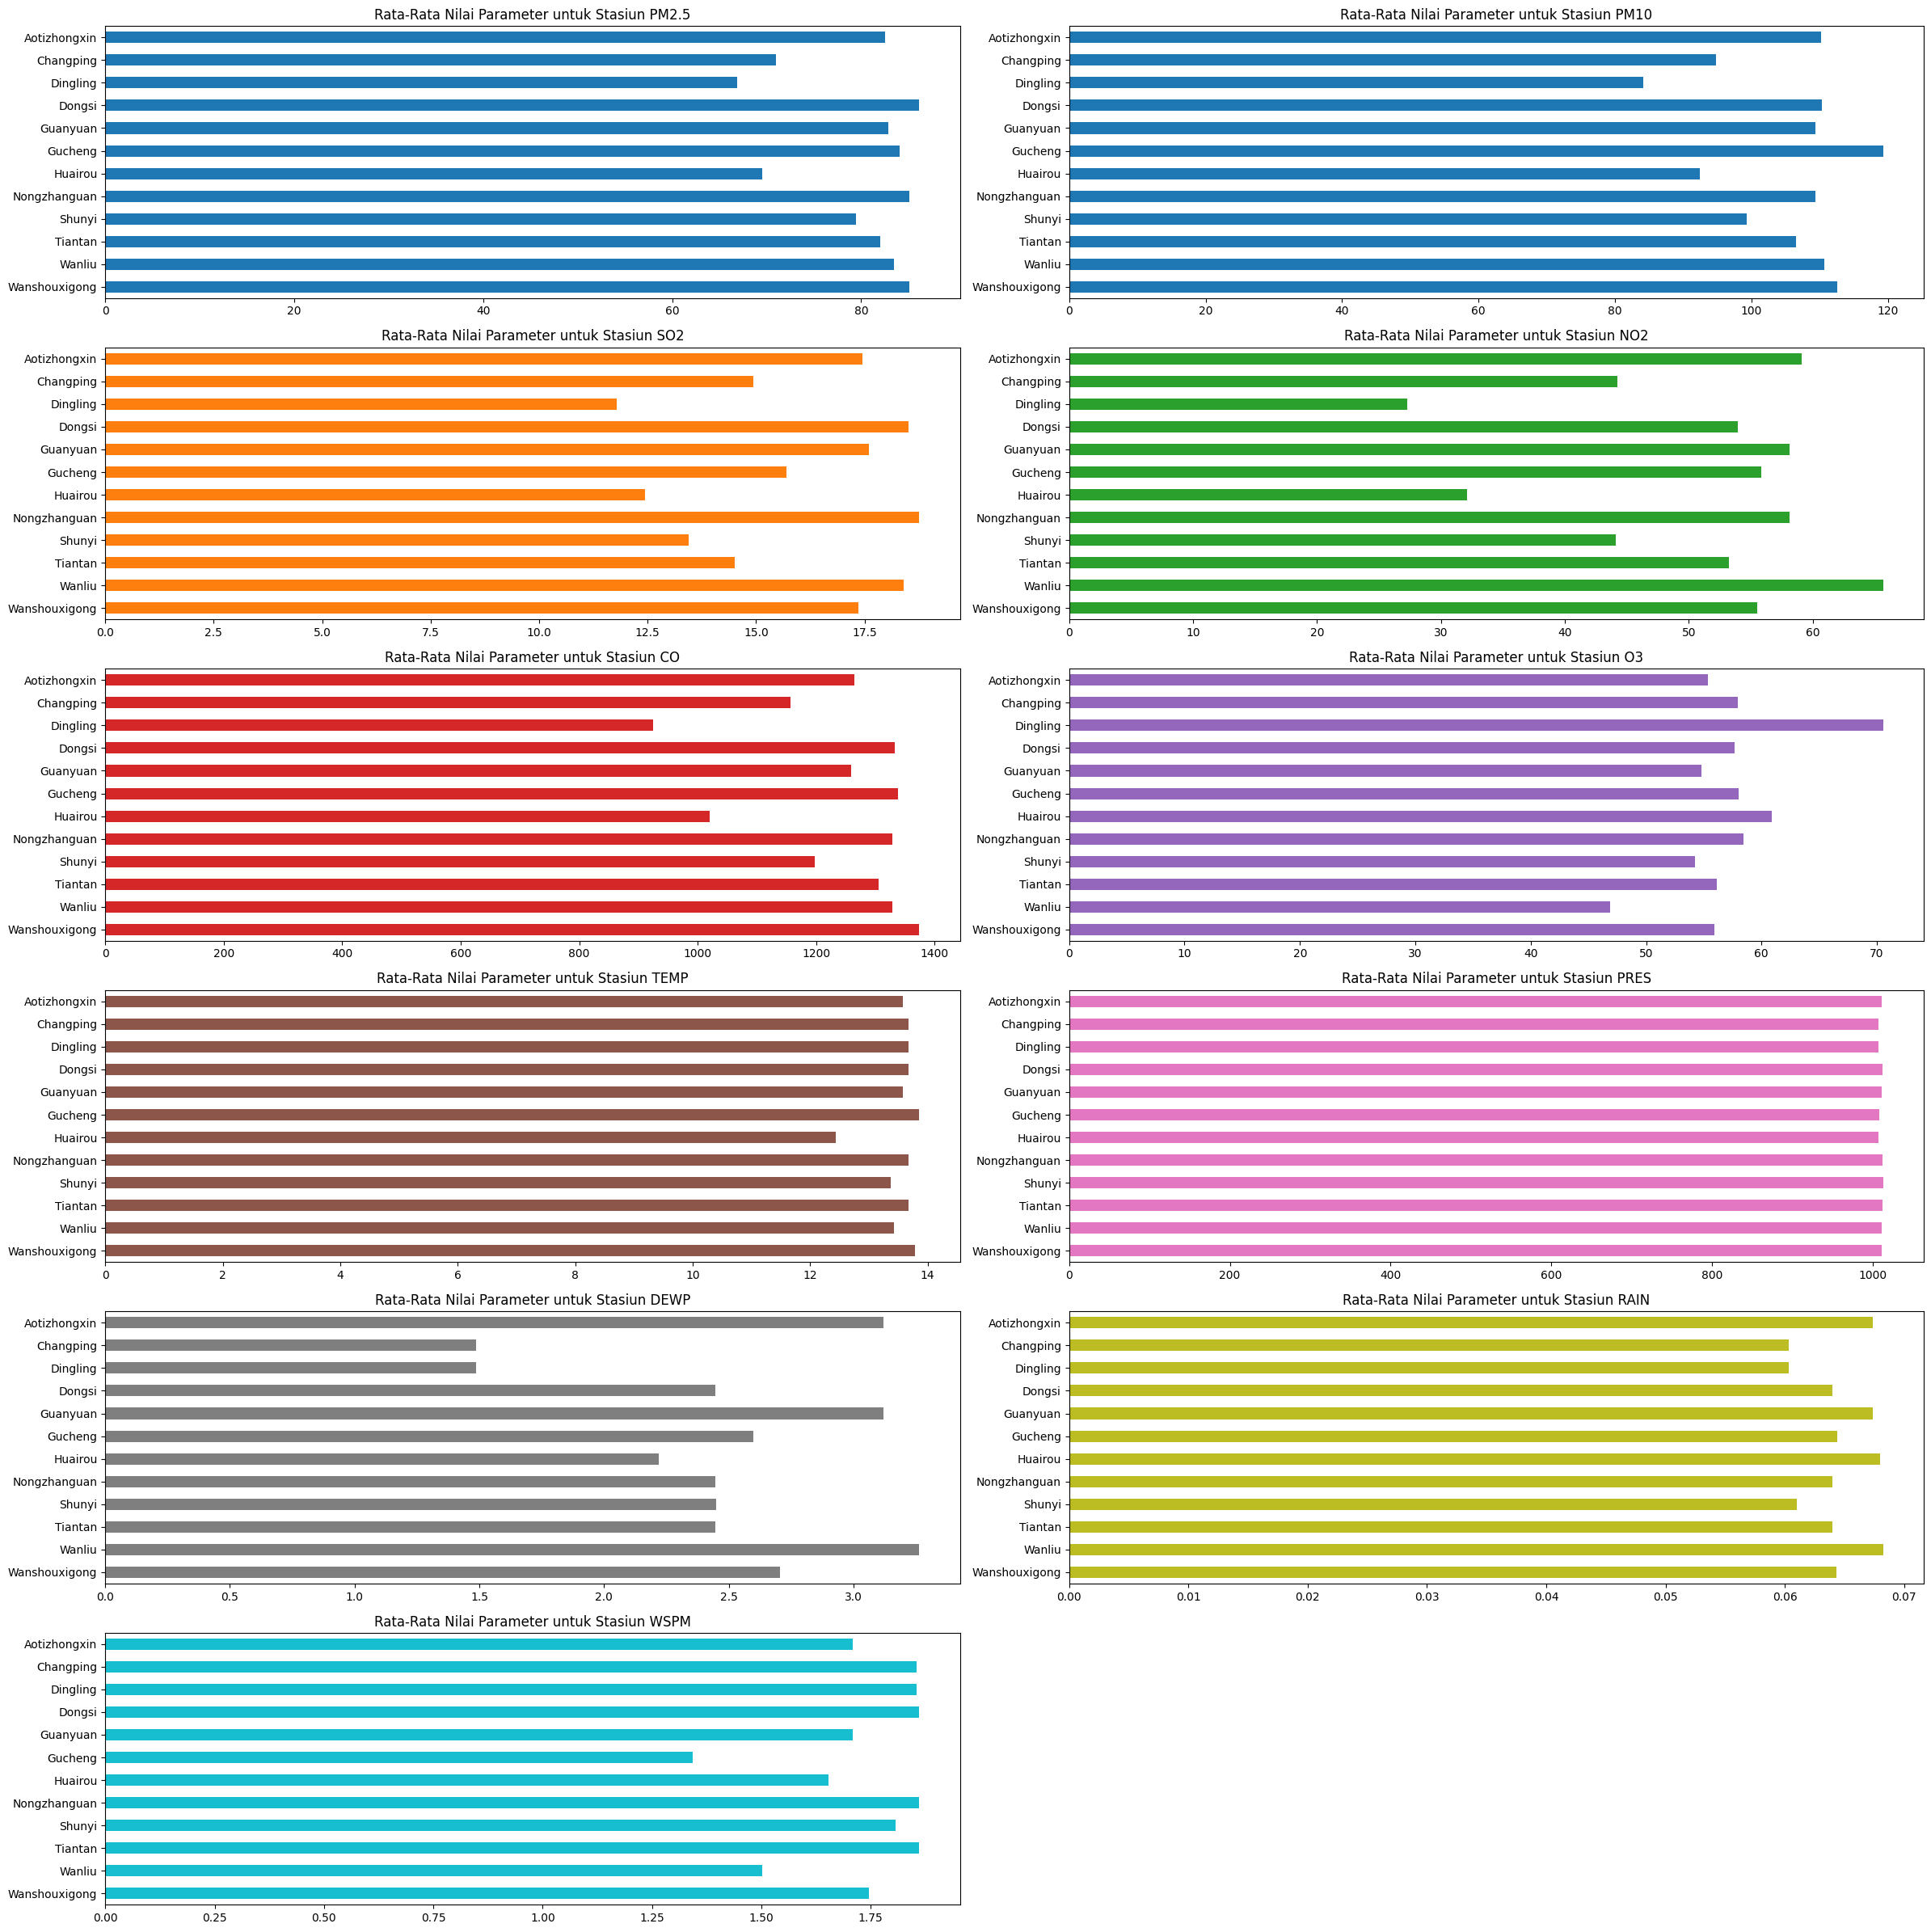

In [ ]:
datas = pd.DataFrame(mean_values)

n = len(datas.index)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 24))
axes = axes.ravel()
cmap = plt.get_cmap('tab10')

for i, station in enumerate(datas.index):
    datas.loc[station].plot(kind='barh', color=cmap(i/n), ax=axes[i])

    axes[i].set_title(f'Rata-Rata Nilai Parameter untuk Stasiun {station}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].invert_yaxis()

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Pada grafik, terlihat dengan jelas bahwa beberapa stasiun memiliki nilai-nilai terendah yang konsisten pada semua kolom data. Ini menunjukkan bahwa stasiun-stasiun tersebut cenderung memiliki kualitas udara yang lebih baik dibandingkan dengan stasiun lainnya.

### Explore ...

Kemudian saya menggabungkan data dari stasiun-stasiun yang terpilih menjadi satu set data tunggal `merge_data` agar memudahkan analisis dan pemrosesan lebih lanjut dengan menyatukan informasi dari beberapa stasiun ke dalam satu entitas data yang lebih terpusat.

In [ ]:
sorted_data = {station: data[station] for station in station_names if station in data}

merge_data = pd.concat(list(sorted_data.values()), axis=0).drop("No", axis=1)
merge_data.reset_index(drop=True).head(12)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01 06:00:00
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01 07:00:00
8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01 08:00:00
9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01 09:00:00


https://datadrivenlab.org/air-quality-2/chinas-new-air-quality-index-how-does-it-measure-up/


Kemudian saya melakukan klustering dengan data yang ada diatas sesuai dengan Parameter Indeks Kualitas Udara negara china


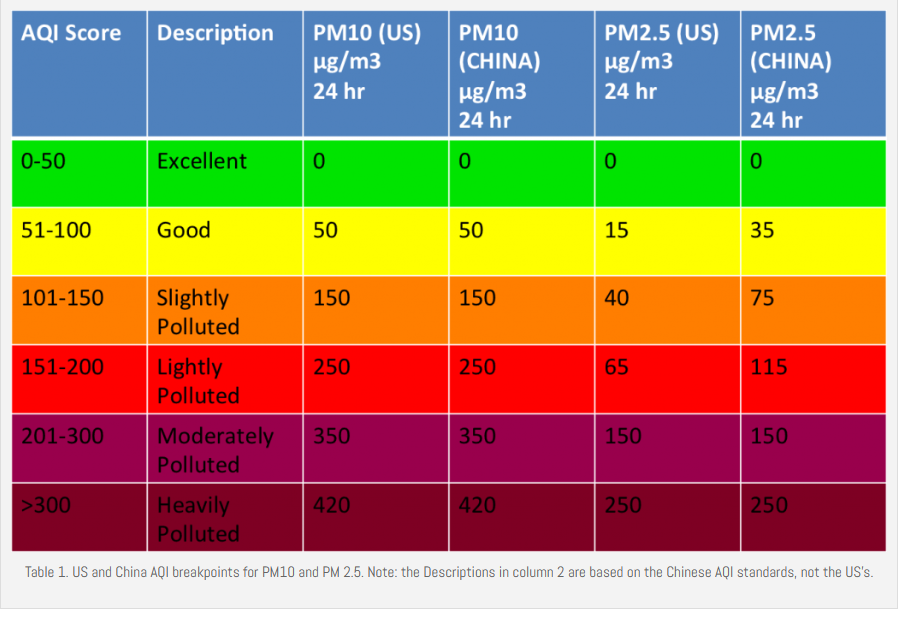



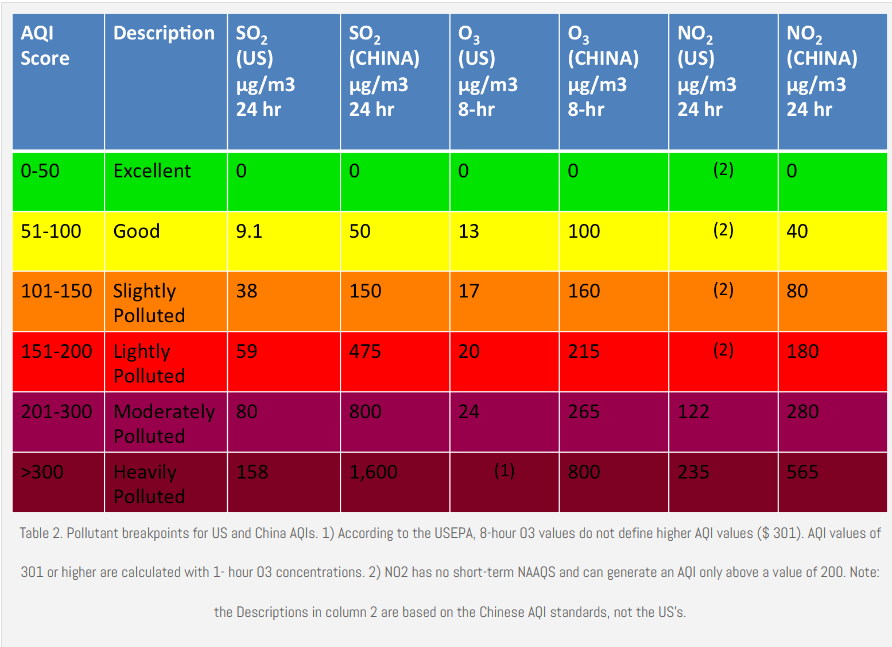

In [ ]:
category_ranges = ['Excellent', 'Good', 'Slightly Polluted', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']

aqi_ranges = [
    ('PM2.5', [35, 75, 115, 150, 250, float('inf')]),
    ('PM10', [50, 150, 250, 350, 420, float('inf')]),
    ('SO2', [50, 150, 475, 800, 1600, float('inf')]),
    ('NO2', [40, 80, 180, 280, 565, float('inf')]),
    ('O3', [100, 160, 215, 265, 800, float('inf')])
]

def categorize(value, ranges):
    return next((i for i, max_val in enumerate(ranges) if value <= max_val), None)

merge_data['Category'] = merge_data.apply(lambda row: category_ranges[max(
    categorize(row[pollutant], ranges) for pollutant, ranges in aqi_ranges
)], axis=1)

In [ ]:
merge_data.head(5)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Excellent
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Excellent
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,Excellent
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Excellent
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Excellent


In [ ]:
category_counts = merge_data.groupby(['station', 'Category']).size().unstack(fill_value=0)[category_ranges]
category_counts

Category,Excellent,Good,Slightly Polluted,Lightly Polluted,Moderately Polluted,Heavily Polluted
station,,,,,,
Aotizhongxin,5779,11539,8245,3585,4129,1787
Changping,9029,11972,6181,3153,3512,1217
Dingling,11995,10298,5086,2993,3442,1250
Dongsi,6256,11306,7752,3545,4134,2071
Guanyuan,5732,11733,8201,3653,4063,1682
Gucheng,6146,10934,8203,3916,4075,1790
Huairou,10815,10755,5765,3284,3381,1064
Nongzhanguan,6146,11013,8177,3519,4181,2028
Shunyi,8961,10272,6807,3454,3925,1645


In [ ]:
merge_data.to_csv('merge_data.csv', index=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara sepanjang tahun? Apakah ada pola musiman?

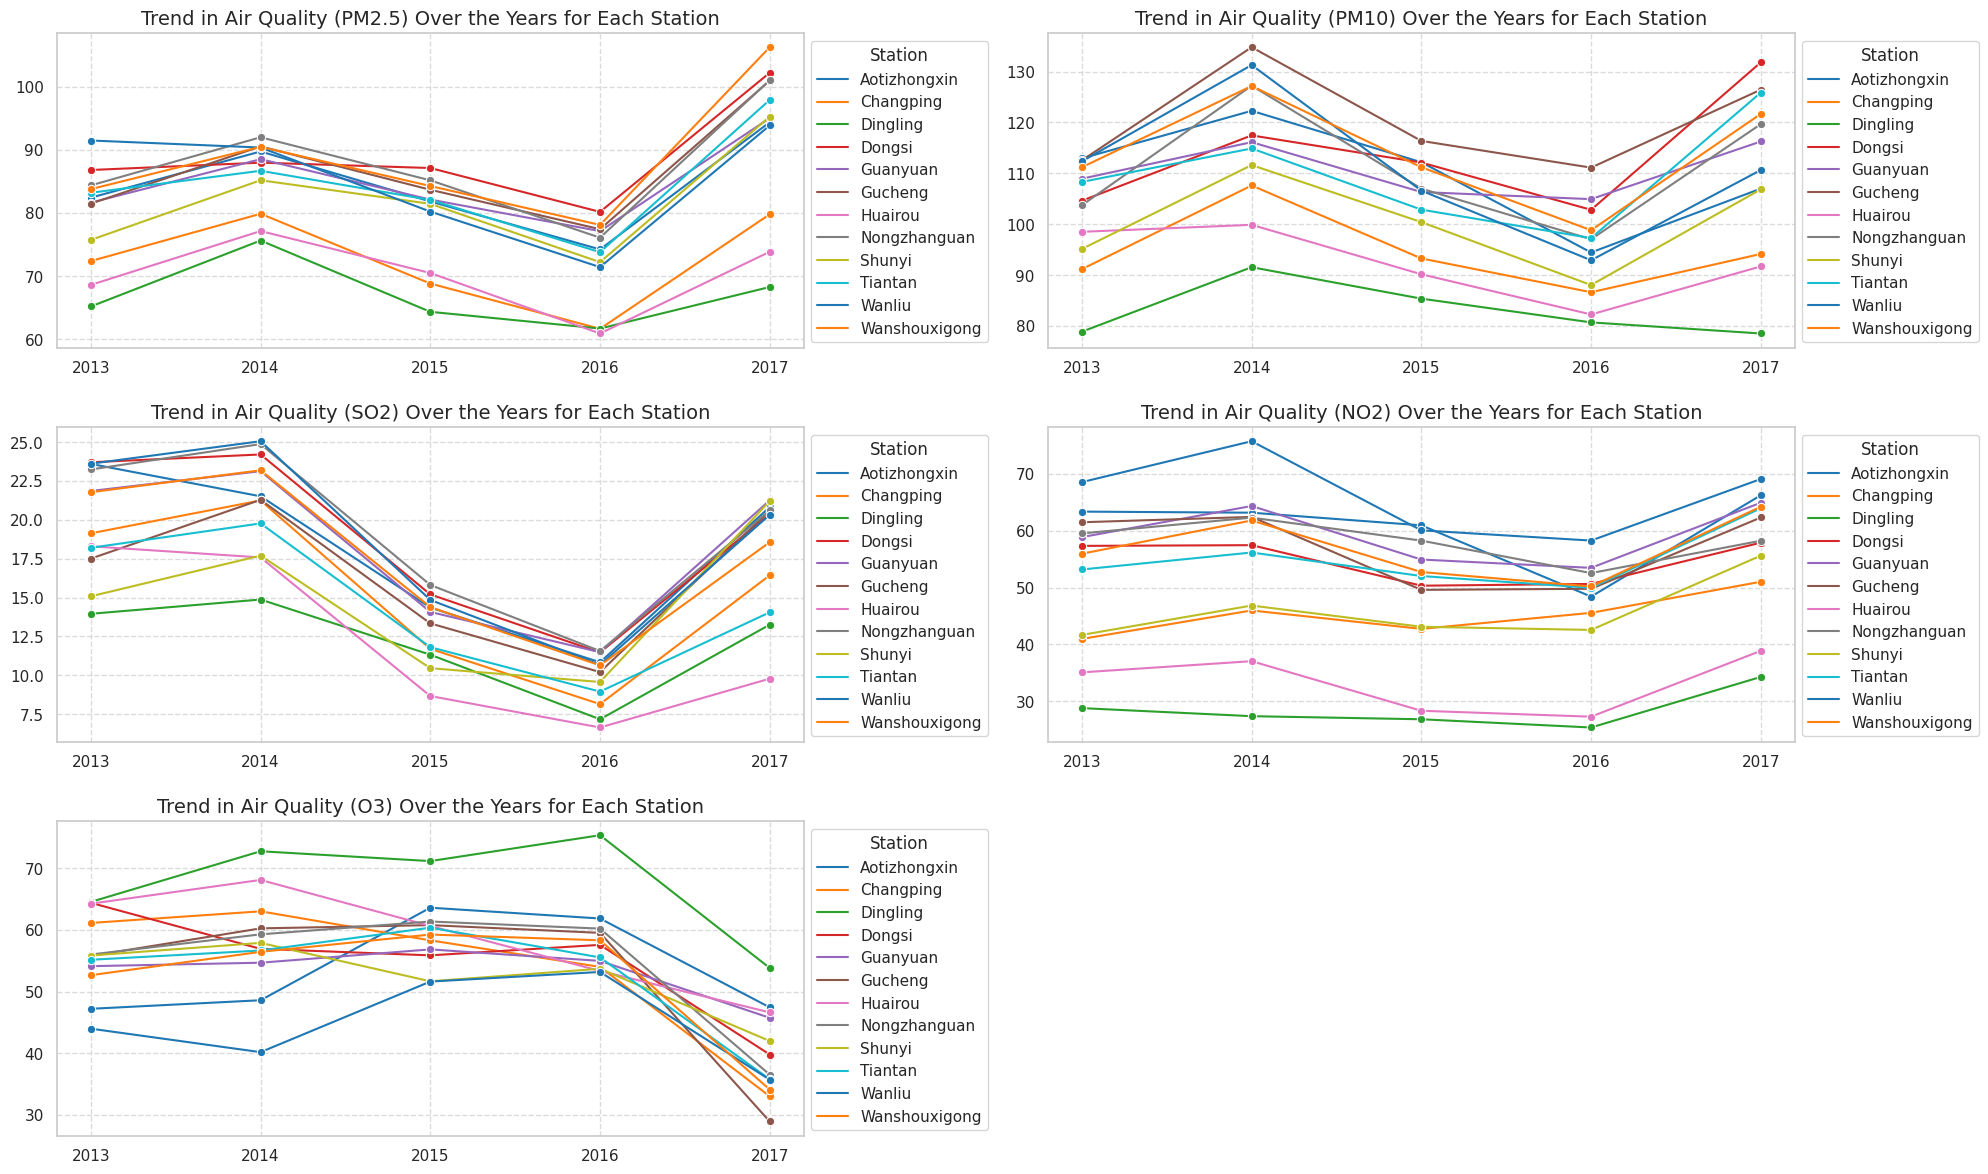

In [ ]:
average_parameters_per_year_all_stations = merge_data.groupby(['datetime', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()
average_parameters_per_year_all_stations['year'] = pd.to_datetime(average_parameters_per_year_all_stations['datetime']).dt.year

palette = sns.color_palette("tab10", n_colors=len(average_parameters_per_year_all_stations['station'].unique()))

fig, axes = plt.subplots(3, 2, figsize=(20, 12))

parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
for i, parameter in enumerate(parameters):
    row = i // 2
    col = i % 2

    sns.lineplot(x='year', y=parameter, hue='station', data=average_parameters_per_year_all_stations, palette=palette, marker='o', ax=axes[row, col], err_style=None)

    axes[row, col].set_title(f'Trend in Air Quality ({parameter}) Over the Years for Each Station', fontsize=14)
    axes[row, col].set_xlabel(None)
    axes[row, col].set_ylabel(None)
    axes[row, col].grid(True, linestyle='--', alpha=0.7)
    axes[row, col].legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left')
    axes[row, col].set_xticks([2013, 2014, 2015, 2016, 2017])

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

*   Secara umum, beberapa stasiun mencatat penurunan kualitas udara PM2.5 dan PM10 pada tahun 2017. Meskipun demikian, tren ini bersifat fluktuatif di beberapa stasiun. Sebelumnya, beberapa stasiun menunjukkan peningkatan kualitas udara dari tahun 2015 hingga 2016, namun kemudian mengalami penurunan kembali pada tahun 2017 dalam hal partikel udara.
*   Selain itu, terlihat juga bahwa tingkat SO2 naik pada tahun 2013 ke 2014, turun pada tahun 2014 dan 2015, serta naik kembali pada tahun 2017. Hal ini menunjukkan bahwa tingkat polusi SO2 bersifat fluktuatif dan menjadi masalah di wilayah tersebut.
*   Untuk NO2, konsentrasinya cenderung stabil di semua stasiun setiap tahunnya. Sementara itu, konsentrasi O3 cenderung stabil, tetapi mengalami peningkatan pada tahun 2017




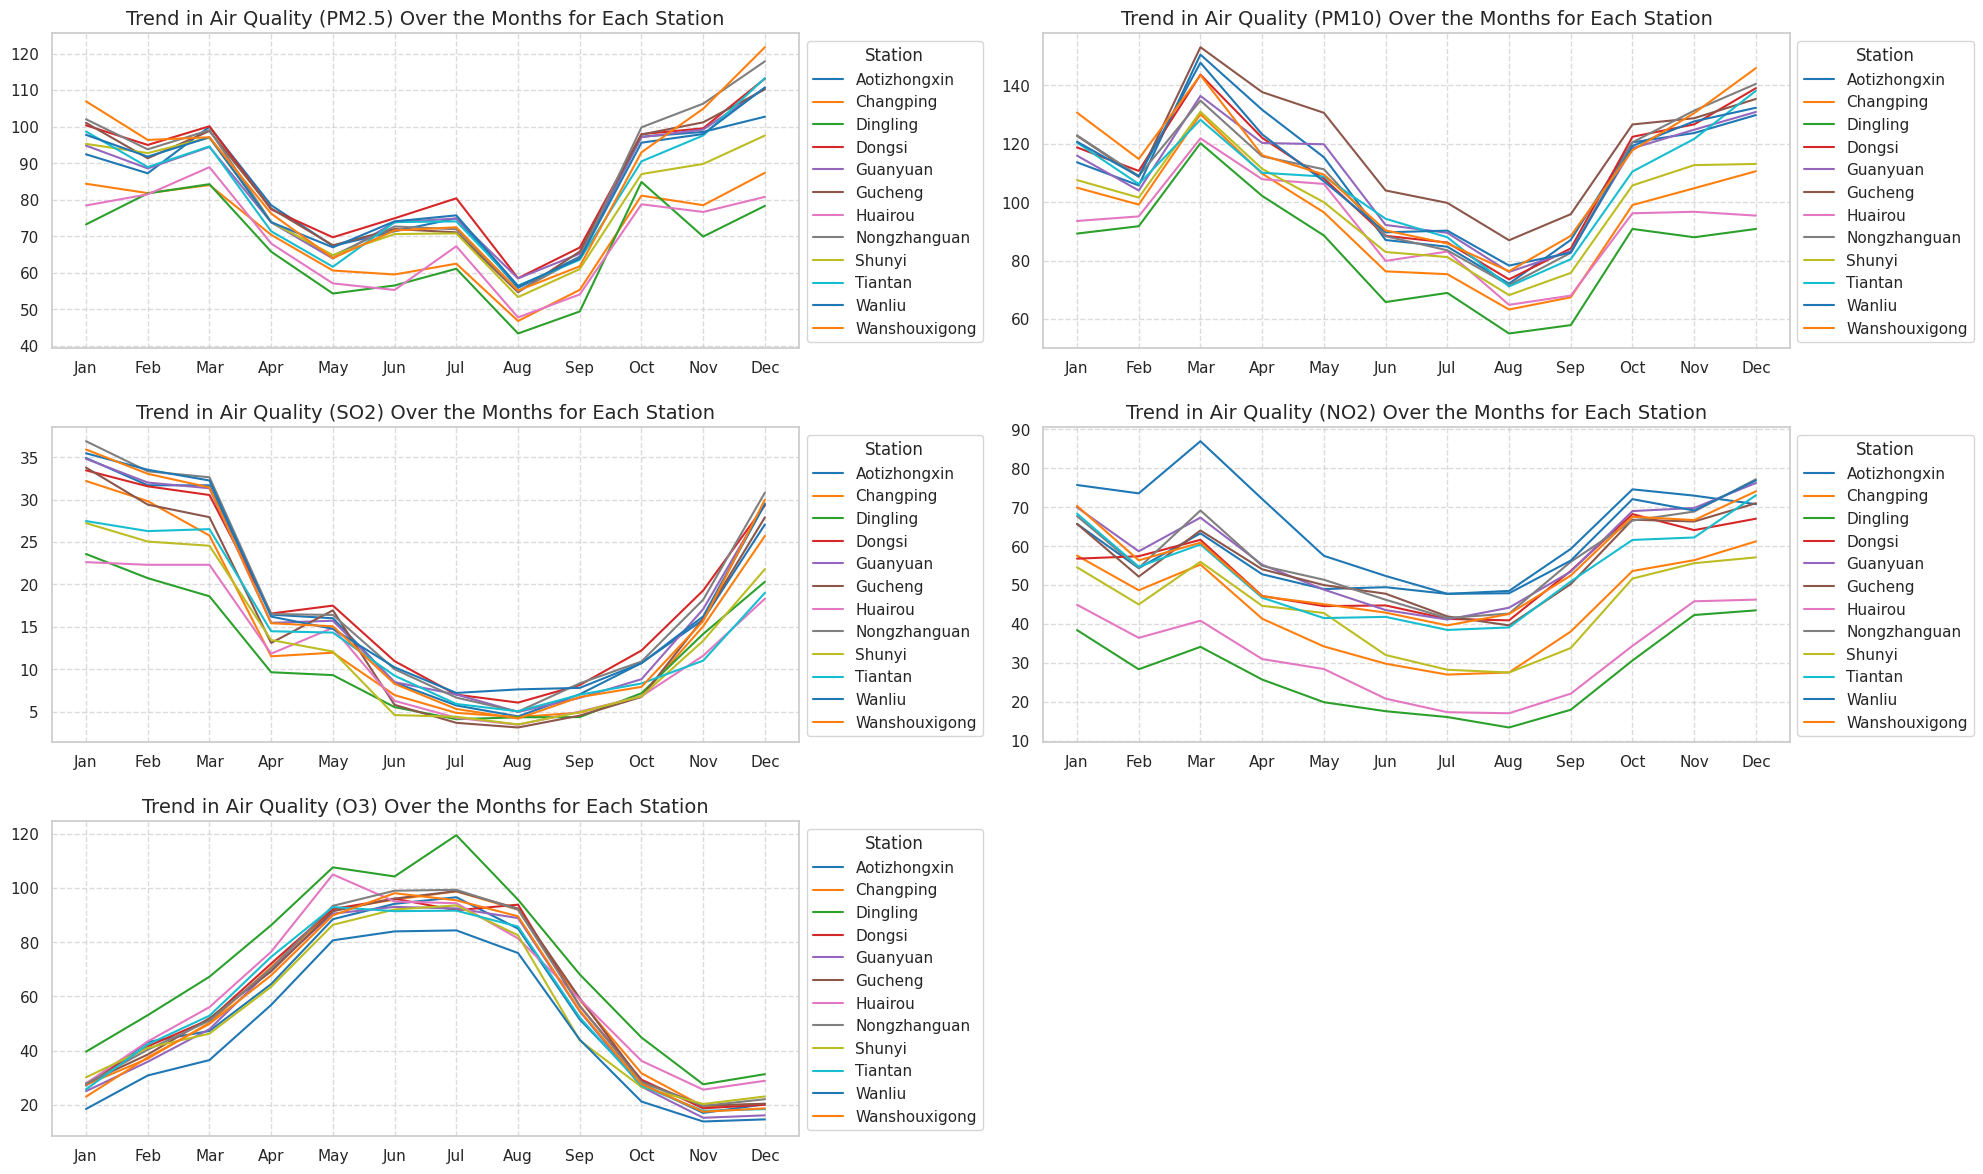

In [ ]:
average_parameters_per_month_all_stations = merge_data.groupby(['datetime', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()
average_parameters_per_month_all_stations['month'] = pd.to_datetime(average_parameters_per_year_all_stations['datetime']).dt.month

palette = sns.color_palette("tab10", n_colors=len(average_parameters_per_month_all_stations['station'].unique()))

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(3, 2, figsize=(20, 12))

parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
for i, parameter in enumerate(parameters):
    row = i // 2
    col = i % 2

    sns.lineplot(x='month', y=parameter, hue='station', data=average_parameters_per_month_all_stations, palette=palette, ax=axes[row, col], err_style=None)

    axes[row, col].set_title(f'Trend in Air Quality ({parameter}) Over the Months for Each Station', fontsize=14)
    axes[row, col].set_xlabel(None)
    axes[row, col].set_ylabel(None)
    axes[row, col].grid(True, linestyle='--', alpha=0.7)
    axes[row, col].legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left')
    axes[row, col].set_xticks(range(1, 13))
    axes[row, col].set_xticklabels(month_labels)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

Dari grafik tampaknya terlihat ada pola musiman dalam kualitas udara untuk setiap parameter (PM2.5, PM10, SO2, NO2). Kualitas udara cenderung memburuk pada bulan-bulan dingin (November hingga Februari) dan membaik pada bulan-bulan hangat. Namun, untuk parameter O3, polanya tampaknya terbalik.

### Pertanyaan 2: Bagaimana hubungan antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), kecepatan angin (WSMPM) dan hujan (RAIN) dengan kualitas udara?

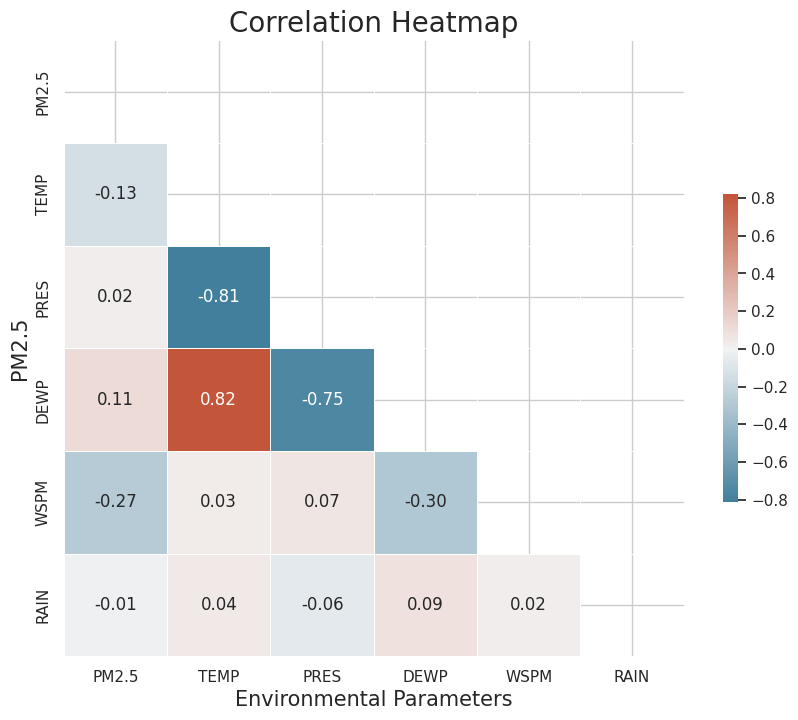

In [ ]:
selected_columns = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']
selected_data = merge_data[selected_columns]

correlation_matrix = selected_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=20)


plt.xlabel('Environmental Parameters', fontsize=15)
plt.ylabel('PM2.5', fontsize=15)

plt.show()

Dari heatmap diatas:

1. **Suhu (TEMP)**: Suhu memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.13, yang berarti bahwa peningkatan suhu cenderung dikaitkan dengan kenaikan kualitas udara, meskipun hubungan ini tidak kuat.

2. **Tekanan (PRES)**: Tekanan memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah 0.02, yang berarti bahwa peningkatan tekanan cenderung dikaitkan dengan penurunan kualitas udara, meskipun hubungan ini sangat lemah.

3. **Titik Embun (DEWP)**: Titik embun memiliki korelasi positif dengan PM2.5. Nilai korelasinya adalah 0.11, yang berarti bahwa peningkatan titik embun cenderung dikaitkan dengan penurunan kualitas udara. Hubungan ini juga sangat lemah.

4. **Kecepatan Angin (WSMPM)**: Kecepatan angin memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.27, yang berarti bahwa peningkatan kecepatan angin cenderung dikaitkan dengan kenaikan kualitas udara. Hubungan ini moderat.

5. **Hujan (RAIN)**: Hujan memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.01, yang berarti bahwa peningkatan curah hujan cenderung dikaitkan dengan kenaikan kualitas udara, meskipun hubungan ini sangat lemah.

### Pertanyaan 3: Stasiun mana yang memiliki kualitas udara terburuk dan terbaik?

In [ ]:
average_per_station = merge_data.groupby('station')[parameters].mean()
average_per_station

,PM2.5,PM10,SO2,NO2,O3
station,,,,,
Aotizhongxin,82.540623,110.210033,17.459251,59.074106,55.328626
Changping,70.986438,94.788575,14.943066,44.206153,57.976253
Dingling,66.845557,84.113713,11.797849,27.306327,70.530792
Dongsi,86.144243,110.347617,18.506142,53.953078,57.700357
Guanyuan,82.897522,109.372349,17.609312,58.139298,54.817142
Gucheng,84.074802,119.261567,15.705821,55.847982,58.000001
Huairou,69.501747,92.422670,12.446681,32.077275,60.872173
Nongzhanguan,85.079472,109.384022,18.760102,58.095053,58.432876
Shunyi,79.437962,99.271936,13.445971,44.094695,54.218810


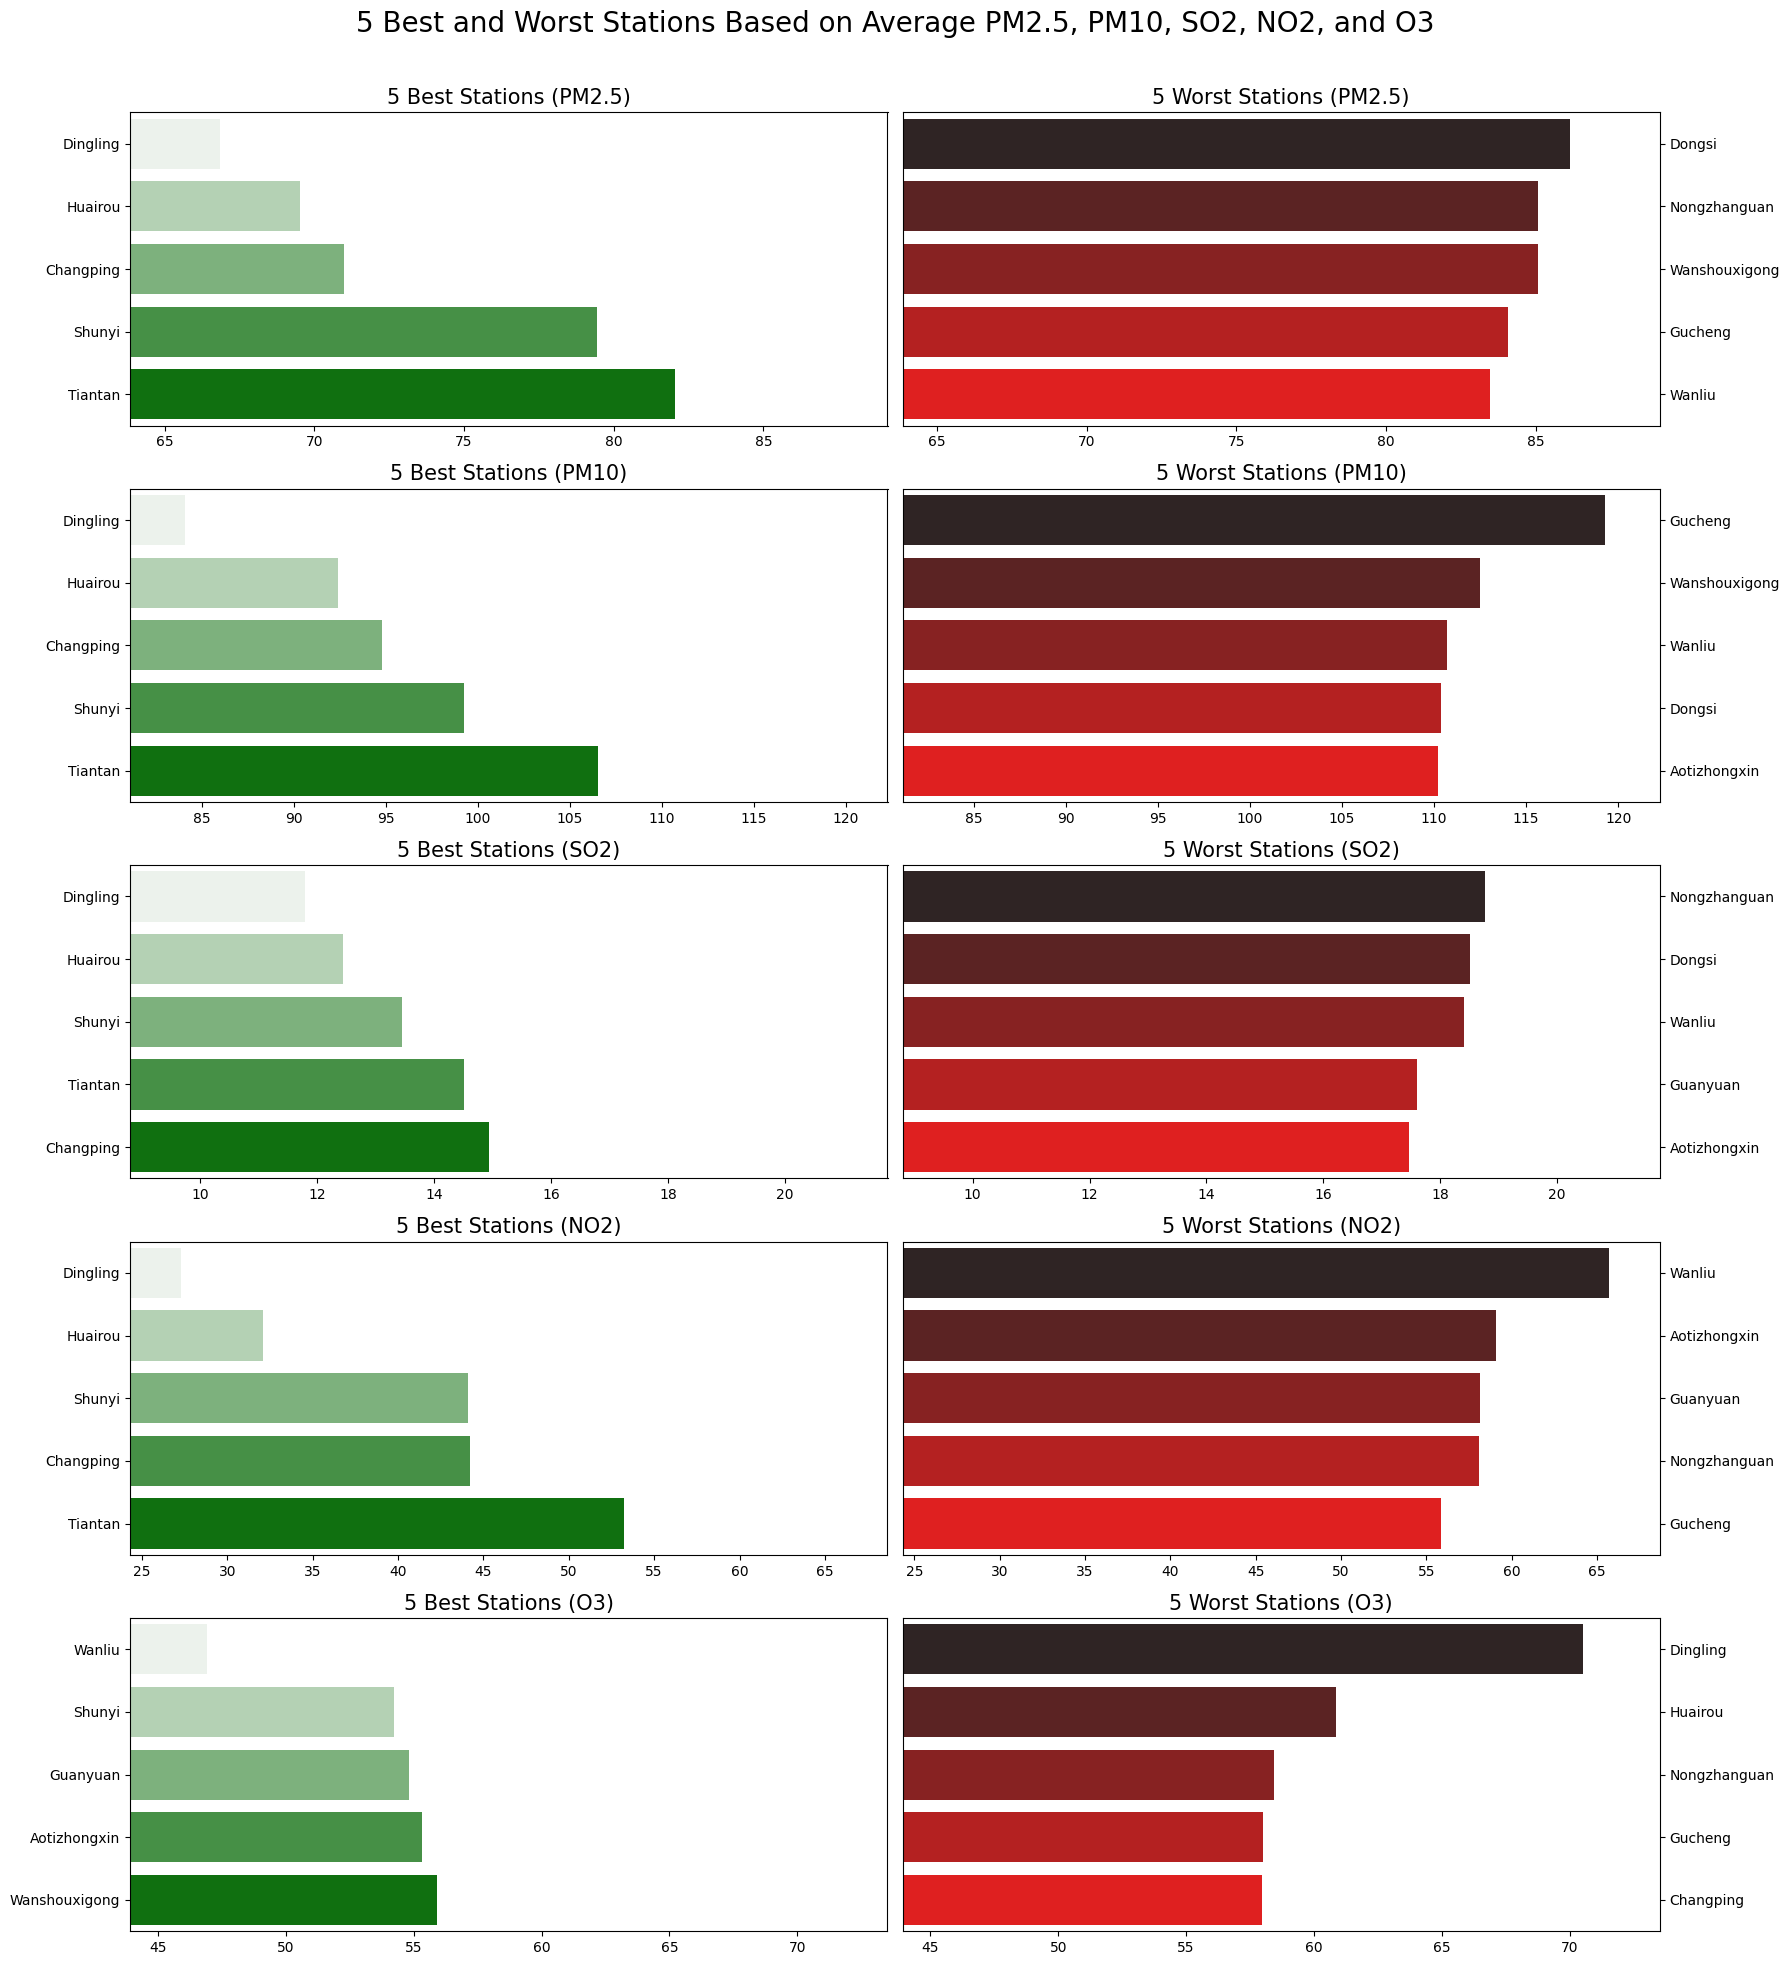

In [ ]:
worst_stations = {}
best_stations = {}

for param in parameters:
    worst_stations[param] = average_per_station.nlargest(5, param)
    best_stations[param] = average_per_station.nsmallest(5, param)

fig, axes = plt.subplots(5, 2, figsize=(18, 20))

for i, param in enumerate(parameters):
    sns.barplot(x=param, y=best_stations[param].index, data=best_stations[param], palette=sns.light_palette("green", n_colors=5), ax=axes[i, 0])
    axes[i, 0].set(xlabel=None, ylabel=None)
    axes[i, 0].set_title(f'5 Best Stations ({param})', fontsize=15)

for i, param in enumerate(parameters):
    sns.barplot(x=param, y=worst_stations[param].index, data=worst_stations[param], palette=sns.dark_palette("red", n_colors=5), ax=axes[i, 1])
    axes[i, 1].set(xlabel=None, ylabel=None)
    axes[i, 1].set_title(f'5 Worst Stations ({param})', fontsize=15)
    axes[i, 1].invert_xaxis()
    axes[i, 1].yaxis.set_label_position("right")
    axes[i, 1].yaxis.tick_right()

    x_min = min(best_stations[param][param].min(), worst_stations[param][param].min()) - 3
    x_max = max(best_stations[param][param].max(), worst_stations[param][param].max()) + 3
    axes[i, 0].set_xlim(x_min, x_max)
    axes[i, 1].set_xlim(x_min, x_max)

plt.suptitle("5 Best and Worst Stations Based on Average PM2.5, PM10, SO2, NO2, and O3", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

Berdasarkan grafik, tampaknya stasiun Dingling, Huairou, Changping, Shunyi, dan Tiantan termasuk dalam 5 stasiun dengan kualitas udara terbaik berdasarkan parameter PM2.5, PM10, SO2, dan NO2. Sementara itu, stasiun Dongsi, Nongzhanguan, Wanshouxigong, Gucheng, dan Wanliu termasuk dalam 5 stasiun dengan kualitas udara terburuk untuk parameter yang sama. Namun, untuk parameter O3, urutan stasiun terbaik dan terburuk tampaknya terbalik, kecuali untuk stasiun Gucheng dan Nongzhanguan yang posisinya tetap.

### Pertanyaan 4: Bagaimana jumlah kategori indeks kualitas udara (AQI) untuk berbagai stasiun?

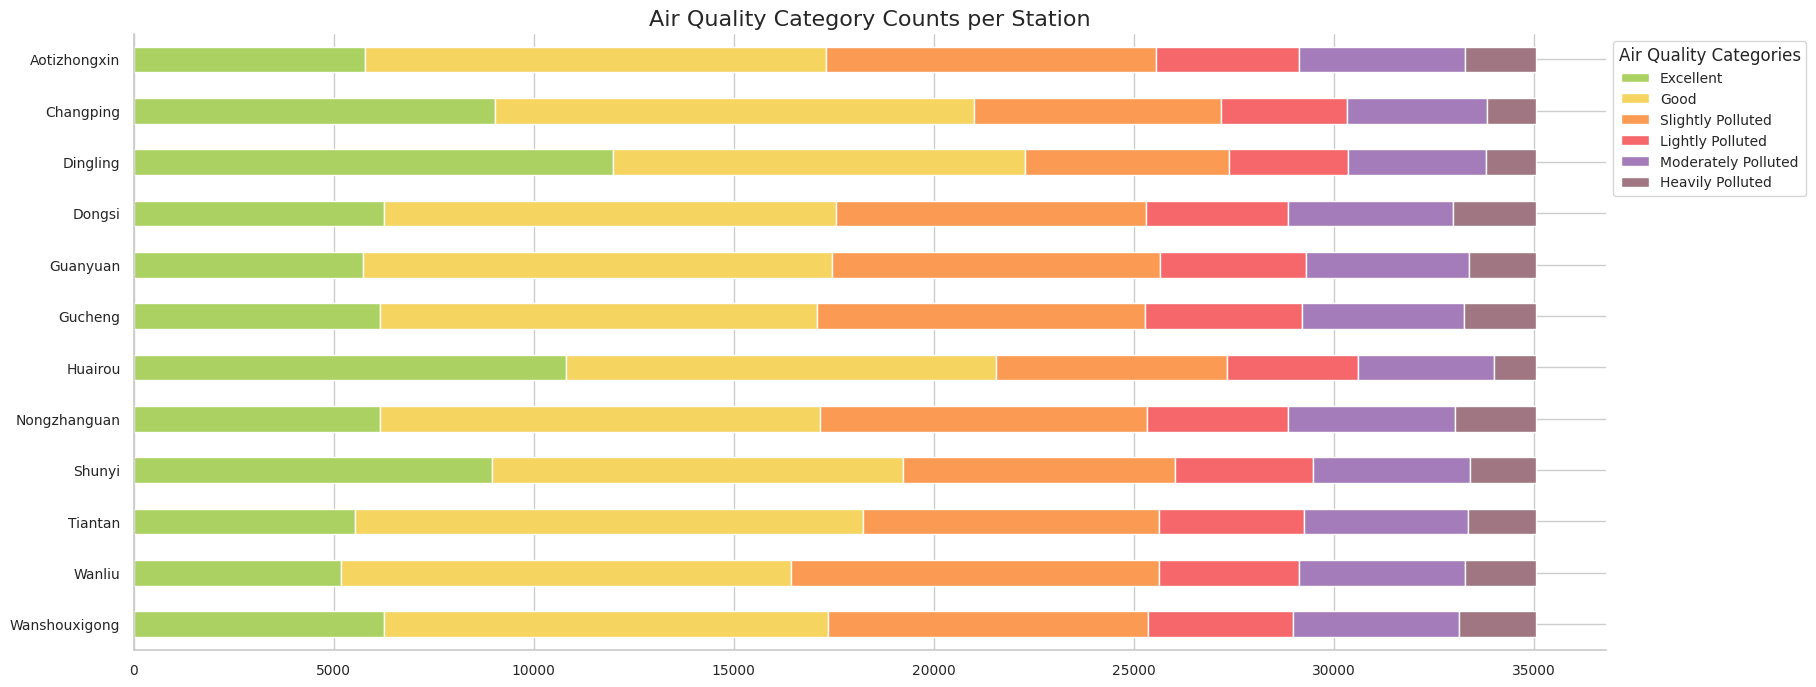

In [ ]:
def plot_air_quality_category_counts(category_counts, category_ranges, custom_colors):
    sns.set(style="whitegrid")
    cmap = mcolors.ListedColormap(custom_colors)

    # Sort the DataFrame by station names in reverse order
    category_counts = category_counts.sort_index(ascending=False)

    ax = category_counts[category_ranges].plot(
        kind='barh', stacked=True, figsize=(19, 8), colormap=cmap, edgecolor='w'
    )

    plt.title('Air Quality Category Counts per Station', fontsize=16)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(ha='center', fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

category_ranges = ['Excellent', 'Good', 'Slightly Polluted', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted']
custom_colors = ['#abd162', '#f6d460', '#fb9a52', '#f5676b', '#a37cb9', '#a07682']

plot_air_quality_category_counts(category_counts, category_ranges, custom_colors)


Tentu, berikut adalah kalimat yang telah diperbaiki:

Diagram batang bertumpuk ini merepresentasikan kategori Indeks Kualitas Udara (AQI) dari berbagai stasiun pemantauan di wilayah tertentu. AQI digunakan untuk mengevaluasi kualitas udara dan dampaknya terhadap kesehatan manusia.

1. **Stasiun dengan Kategori "Sangat Baik":**
   - Stasiun Dingling dan Huairou menunjukkan jumlah hari dengan kualitas udara "Sangat Baik" yang paling banyak, yaitu 11995 dan 10815 hari. Ini menunjukkan bahwa kedua stasiun ini memiliki kualitas udara yang baik lebih sering dibandingkan stasiun lainnya.

2. **Stasiun dengan Kategori "Baik":**
   - Stasiun Tiantan dan Changping memiliki jumlah hari dengan kualitas udara "Baik" yang paling banyak, yaitu 12685 dan 11972 hari. Ini menunjukkan bahwa kedua stasiun ini sering mengalami hari dengan kualitas udara yang baik.

3. **Stasiun dengan Kategori "Sedikit Tercemar":**
   - Stasiun Wanliu memiliki jumlah hari dengan kualitas udara "Sedikit Tercemar" yang paling banyak, yaitu 9199 hari. Ini menunjukkan bahwa stasiun ini sering mengalami kondisi udara yang sedikit tercemar.

4. **Stasiun dengan Kategori "Tercemar Ringan":**
   - Stasiun Gucheng dan Guanyuan memiliki jumlah hari dengan kualitas udara "Tercemar Ringan" yang relatif tinggi, yaitu 3916 dan 3653 hari. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin berisiko mengalami masalah kesehatan pada beberapa hari.

5. **Stasiun dengan Kategori "Tercemar Sedang":**
   - Stasiun Nongzhanguan dan Wanliu memiliki jumlah hari dengan kualitas udara "Tercemar Sedang" yang relatif tinggi, yaitu 4181 dan 4170 hari. Ini menunjukkan bahwa kedua stasiun ini beberapa kali lebih sering mengalami kondisi udara yang tercemar sedang, yang dapat membahayakan semua orang. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin lebih berisiko mengalami masalah kesehatan pada beberapa hari.

6. **Stasiun dengan Kategori "Tercemar Berat":**
   - Stasiun Nongzhanguan dan Dongsi memiliki jumlah hari dengan kualitas udara "Tercemar Berat" yang relatif tinggi dibandingkan stasiun lainnya. Ini menunjukkan bahwa wilayah ini beberapa kali lebih sering mengalami kualitas udara yang sangat buruk. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin sangat berisiko mengalami masalah kesehatan pada beberapa hari.

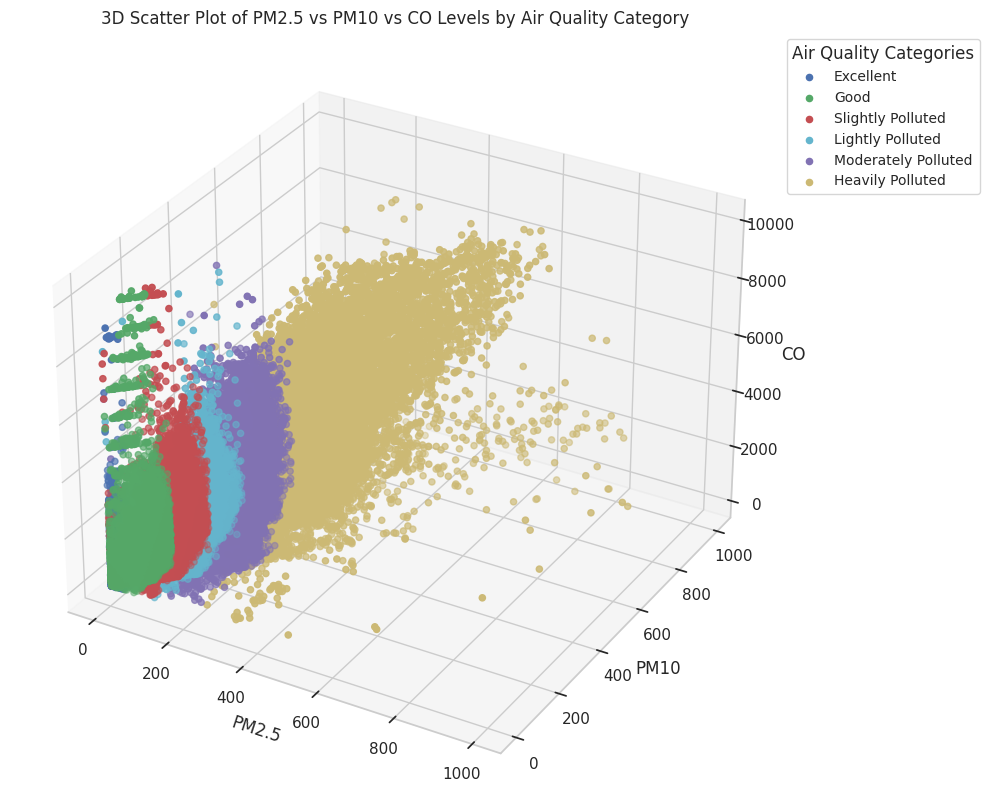

In [ ]:
fig = plt.figure(figsize=(26, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, category in enumerate(category_ranges):
    category_data = merge_data[merge_data['Category'] == category]
    ax.scatter(category_data['PM2.5'], category_data['PM10'], category_data['CO'],
               color=colors[i % len(colors)], label=category)

ax.set_xlabel('PM2.5')
ax.set_ylabel('PM10')
ax.set_zlabel('CO')
ax.set_title('3D Scatter Plot of PM2.5 vs PM10 vs CO Levels by Air Quality Category')
ax.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

Dari grafik ini terlihat bahwa persebaran kategori kualitas udara, terlihat bahwa sebagian besar kategori sangat tercemar sangat tersebar.

## Conclusion

- Secara umum, beberapa stasiun mencatat penurunan kualitas udara PM2.5 dan PM10 pada tahun 2017. Meskipun demikian, tren ini bersifat fluktuatif di beberapa stasiun. Sebelumnya, beberapa stasiun menunjukkan peningkatan kualitas udara dari tahun 2015 hingga 2016, namun kemudian mengalami penurunan kembali pada tahun 2017 dalam hal partikel udara.
Selain itu, terlihat juga bahwa tingkat SO2 naik pada tahun 2013 ke 2014, turun pada tahun 2014 dan 2015, serta naik kembali pada tahun 2017. Hal ini menunjukkan bahwa tingkat polusi SO2 bersifat fluktuatif dan menjadi masalah di wilayah tersebut.
Untuk NO2, konsentrasinya cenderung stabil di semua stasiun setiap tahunnya. Sementara itu, konsentrasi O3 cenderung stabil, tetapi mengalami peningkatan pada tahun 2017
Dari grafik tampaknya terlihat ada pola musiman dalam kualitas udara untuk setiap parameter (PM2.5, PM10, SO2, NO2). Kualitas udara cenderung memburuk pada bulan-bulan dingin (November hingga Februari) dan membaik pada bulan-bulan hangat. Namun, untuk parameter O3, polanya tampaknya terbalik.

- Dari heatmap diatas:
Suhu (TEMP): Suhu memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.13, yang berarti bahwa peningkatan suhu cenderung dikaitkan dengan kenaikan kualitas udara, meskipun hubungan ini tidak kuat.
Tekanan (PRES): Tekanan memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah 0.02, yang berarti bahwa peningkatan tekanan cenderung dikaitkan dengan penurunan kualitas udara, meskipun hubungan ini sangat lemah.
Titik Embun (DEWP): Titik embun memiliki korelasi positif dengan PM2.5. Nilai korelasinya adalah 0.11, yang berarti bahwa peningkatan titik embun cenderung dikaitkan dengan penurunan kualitas udara. Hubungan ini juga sangat lemah.
Kecepatan Angin (WSMPM): Kecepatan angin memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.27, yang berarti bahwa peningkatan kecepatan angin cenderung dikaitkan dengan kenaikan kualitas udara. Hubungan ini moderat.
Hujan (RAIN): Hujan memiliki korelasi negatif dengan PM2.5. Nilai korelasinya adalah -0.01, yang berarti bahwa peningkatan curah hujan cenderung dikaitkan dengan kenaikan kualitas udara, meskipun hubungan ini sangat lemah.

- Berdasarkan grafik, tampaknya stasiun Dingling, Huairou, Changping, Shunyi, dan Tiantan termasuk dalam 5 stasiun dengan kualitas udara terbaik berdasarkan parameter PM2.5, PM10, SO2, dan NO2. Sementara itu, stasiun Dongsi, Nongzhanguan, Wanshouxigong, Gucheng, dan Wanliu termasuk dalam 5 stasiun dengan kualitas udara terburuk untuk parameter yang sama. Namun, untuk parameter O3, urutan stasiun terbaik dan terburuk tampaknya terbalik, kecuali untuk stasiun Gucheng dan Nongzhanguan yang posisinya tetap.

- Diagram batang bertumpuk ini merepresentasikan kategori Indeks Kualitas Udara (AQI) dari berbagai stasiun pemantauan di wilayah tertentu. AQI digunakan untuk mengevaluasi kualitas udara dan dampaknya terhadap kesehatan manusia.
   - Stasiun Dingling dan Huairou menunjukkan jumlah hari dengan kualitas udara "Sangat Baik" yang paling banyak, yaitu 11995 dan 10815 hari. Ini menunjukkan bahwa kedua stasiun ini memiliki kualitas udara yang baik lebih sering dibandingkan stasiun lainnya.
   - Stasiun Tiantan dan Changping memiliki jumlah hari dengan kualitas udara "Baik" yang paling banyak, yaitu 12685 dan 11972 hari. Ini menunjukkan bahwa kedua stasiun ini sering mengalami hari dengan kualitas udara yang baik.
   - Stasiun Wanliu memiliki jumlah hari dengan kualitas udara "Sedikit Tercemar" yang paling banyak, yaitu 9199 hari. Ini menunjukkan bahwa stasiun ini sering mengalami kondisi udara yang sedikit tercemar.
   - Stasiun Gucheng dan Guanyuan memiliki jumlah hari dengan kualitas udara "Tercemar Ringan" yang relatif tinggi, yaitu 3916 dan 3653 hari. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin berisiko mengalami masalah kesehatan pada beberapa hari.
   - Stasiun Nongzhanguan dan Wanliu memiliki jumlah hari dengan kualitas udara "Tercemar Sedang" yang relatif tinggi, yaitu 4181 dan 4170 hari. Ini menunjukkan bahwa kedua stasiun ini beberapa kali lebih sering mengalami kondisi udara yang tercemar sedang, yang dapat membahayakan semua orang. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin lebih berisiko mengalami masalah kesehatan pada beberapa hari.
   - Stasiun Nongzhanguan dan Dongsi memiliki jumlah hari dengan kualitas udara "Tercemar Berat" yang relatif tinggi dibandingkan stasiun lainnya. Ini menunjukkan bahwa wilayah ini beberapa kali lebih sering mengalami kualitas udara yang sangat buruk. Ini menunjukkan bahwa individu dengan kondisi pernapasan di area ini mungkin sangat berisiko mengalami masalah kesehatan pada beberapa hari.